<a href="https://colab.research.google.com/github/RachelRamirez/misclassification_matrix/blob/main/10_Runs_of_DifferentCosts_40D_with_SGD_LR_0point1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
# How to change the local time in Google Colab
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/US/Eastern /etc/localtime
!date

#If this doesn't show the local time correctly, then you need to restart.
import time
time.localtime(time.time())

Tue 02 May 2023 02:00:39 AM EDT


time.struct_time(tm_year=2023, tm_mon=5, tm_mday=2, tm_hour=6, tm_min=0, tm_sec=39, tm_wday=1, tm_yday=122, tm_isdst=0)

We'll start by writing a `.py` file which we'll import.

In [2]:
#@title
# import ImportLibraries_DefineFunctions
import requests
url = 'https://raw.githubusercontent.com/RachelRamirez/misclassification_matrix/main/ImportLibraries_DefineFunctions.py'
r = requests.get(url)


# make sure your filename is the same as how you want to import 
with open('ImportLibraries_DefineFunctions.py', 'w') as f:
    f.write(r.text)

# now we can import


In [3]:
# import ImportLibraries_DefineFunctions   #This didn't work for some reason so I do execfile() instead and that works

In [4]:
#@title
# #@title
# # Bring the file into the local Python environment.
execfile('ImportLibraries_DefineFunctions.py')

# Call the function defined in the file.
# f()
time.localtime(time.time())

TF version:  2.12.0
Keras version:  2.12.0
Finished Loading Libraries
11490434/11490434 [==============================] - 1s 0us/step
60000 train samples
7500 validation samples
2500 test samples
Train [0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751666 0.09915   ]
Train # of 9s 5949.0
Train # of 4s 5842.0
Val [0.09586667 0.1132     0.10453334 0.10066666 0.09986667 0.09013333
 0.09413333 0.1016     0.09746667 0.10253333]
Val # of 9s 769.0
Val # of 4s 749.0
Test [0.1044 0.1144 0.0992 0.102  0.0932 0.0864 0.1008 0.1064 0.0972 0.096 ]
Test  # of 9s 240.0
Test  # of 4s 233.0


time.struct_time(tm_year=2023, tm_mon=5, tm_mday=2, tm_hour=2, tm_min=0, tm_sec=51, tm_wday=1, tm_yday=122, tm_isdst=1)

In [5]:
#@title
# #As of 4/18 I am changing this code to save weights initially after five epochs using lambdavalue=1 initially

# rms = RMSprop()  #https://keras.io/api/optimizers/rmsprop/ #default learning_rate=0.001
sgd = SGD(learning_rate=0.1)

patience = 0


# SET THE IITIAL LAMBDA VALUE! 
cost_matrix = np.ones((10,10))
lambda_val = 1

Truth=9
Predicted=4
cost_matrix[Truth, Predicted] = lambda_val


# # Define the per-epoch callback.
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix, )
# cr_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_classification_report, )
# es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights = True)





# ## Examples from TDS
# from tensorflow.keras.callbacks import LambdaCallback
# epoch_callback = LambdaCallback(
#     on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1))
# )
# batch_loss_callback = LambdaCallback(
#     on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
# )
# train_finish_callback = LambdaCallback(
#     on_train_end=lambda logs: print('Training finished!')
# )

# # Lambda function using if else & else if
# min = lambda a, b, c : f"{a} is smaller" if(a < b & b < c) \
#      else f"{b} is smaller"  if (b < c) else f"{c} is smaller" 
# print(min(40, 30, 10))

epoch_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end = lambda epoch,logs: 
                                                   print(' Epoch {} modulus 10 is {}!'.format(epoch+1, (epoch+1)%10))  if(epoch+1)%10==0 else print("", end=" ")  )


# cr_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end= lambda epoch, logs:
# #                                                log_classification_report(epoch, logs) if(epoch+1)%5==0 else print(" ") )
#                                               #  return_cr if(epoch+1)%5==0 else print(" ") )


f1_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_f1_score)


model = create_model()

# save the model weights
model.save_weights('initial_0epochs.h5')



model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)

# model_history = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=10, verbose=2,
#         validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])

# model.save_weights('initial_10epochs.h5')

# model.save_weights('initial_10epochs.h5')
# model.save_weights('baseline_for_100epochs.h5')

# save the model weights
# model.save_weights('initial_150epochs.h5')

 
# cr = return_cr(model)
!date


Tue 02 May 2023 02:00:52 AM EDT


The code below to generate variations of the model training / validation results after training with a cost matrix 30 times did not produce any variability.   Therefore I want to shuffle the training/validation deck randomly between training sessions to see if that helps introduce some randomness.  

#### The Training Runs - Commented out to ensure not run again when the notebook is saved with output

This takes hours to run for about 40 replications so usually after running, I save the out put to GitHub for easy lookup later

In [6]:
#@title
from google.colab import files

## -----------------------------------------------------------------------------------------------------
## Now we need to load the weights of the model, and continue training with a different cost matrix
## ------------------------------------------------------------------------------------------------------
# load the model weights
# model.load_weights('initial_5epochs.h5') 

df = pd.DataFrame()
cost_matrix = np.ones((10,10))

model_history_all = []
cm_all            = []

cost_list = [10, 100, 1000] # Each one takes about 2 minutes 5*4*2=40 minutes for 5 costs/4 reps -- actually all took 40 reps took almost  1.5 hours
reps = 10

for k in cost_list:
  for i in range(reps):
    print("starting rep ", i, " for ", k , "-cost.")

    cost_matrix[9,4] = k
    model = create_model()

    model.load_weights('initial_0epochs.h5')

    #I may need to re-initiate the optimizer to have a smaller learning rate
    model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)
    
    nb_epoch = 110
    # patience = 20

    # es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights = True)

    X_train_shuffled = shuffle(X_train, random_state=42+i)
    Y_train_shuffled = shuffle(Y_train, random_state=42+i)
 

    history = model.fit(X_train_shuffled, Y_train_shuffled,          batch_size=batch_size, epochs=nb_epoch, verbose=0,
            validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback, epoch_callback])

    cm3 = return_cm(model)

    del(history.model)
    model_history_all.append(history)
    cm_all.append(cm3)
    ## Now I need to plot all of the "model_history_all"
 
  
    df = pd.concat([df, pd.DataFrame({"cost": k, "rep": i,
                                      "model_history": [history],
                                      "cm": [cm3]
                                      })] , 
                   ignore_index=True )

    import pickle

    # save the variable to a pickle file
    with open('diffcosts_models_lr0point1.pkl', 'wb') as f:
        pickle.dump(model_history_all, f)

    files.download('diffcosts_models_lr0point1.pkl')

    with open('diffcosts_cms_lr0point1.pkl', 'wb') as f:
        pickle.dump(cm_all, f)

    files.download('diffcosts_cms_lr0point1.pkl')
    !date
    df_string = "df_lr0point1_K" + str(k) + "_R" + str(i) + ".pkl" 

    #Trying to Work Smarter and Save as Dataframe with Rep Cost History and CM
    with open(df_string, 'wb') as f:
        pickle.dump(df, f)

    files.download(df_string)




  # print(model_history_all) #18 items into _ is taking 1 hours and 3 minutes!  perhaps im not usng the right settings - i have no-accelerator on google colab
print(df_string, " is final dataframe file")

starting rep  0  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:03:42 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  1  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:06:29 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  2  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:09:16 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  3  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:12:01 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  4  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:14:46 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  5  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:17:33 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  6  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:20:17 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  7  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:23:05 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  8  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:25:51 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  9  for  10 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:29:14 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  0  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:31:58 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  1  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:34:43 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  2  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:37:26 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  3  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:40:07 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  4  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:43:31 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  5  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:46:12 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  6  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:48:56 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  7  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:51:37 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  8  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:54:25 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  9  for  100 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:57:09 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  0  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 02:59:53 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  1  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:02:37 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  2  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:05:19 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  3  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:08:06 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  4  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:10:49 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  5  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:13:34 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  6  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:16:17 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  7  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:19:01 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  8  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:21:43 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

starting rep  9  for  1000 -cost.
          Epoch 10 modulus 10 is 0!
          Epoch 20 modulus 10 is 0!
          Epoch 30 modulus 10 is 0!
          Epoch 40 modulus 10 is 0!
          Epoch 50 modulus 10 is 0!
          Epoch 60 modulus 10 is 0!
          Epoch 70 modulus 10 is 0!
          Epoch 80 modulus 10 is 0!
          Epoch 90 modulus 10 is 0!
          Epoch 100 modulus 10 is 0!
          Epoch 110 modulus 10 is 0!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tue 02 May 2023 03:25:06 AM EDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

df_lr0point1_K1000_R9.pkl  is final dataframe file


In [7]:
    # # save the variable to a pickle file
    # with open('baseline_models_lr0point1.pkl', 'wb') as f:
    #     pickle.dump(model_history_all, f)

    # files.download('baseline_models_lr0point1.pkl')

    # with open('baseline_cms_lr0point1.pkl', 'wb') as f:
    #     pickle.dump(cm_all, f)

    # files.download('baseline_cms_lr0point1.pkl')

#### Download the multiple runs and reps of Model History from training with different lambda values


Also commented out because once everything is ran and saved, I don't want to accidentally save additional files

#### Load Model History Variables from Pickle Files - must have weighted-categorical-accuracy defined

In [8]:
#Upload and save the history to variable 
import pickle

# # #load the pickle file
# with open('baseline_models_lr0point1.pkl', 'rb') as handle:
#     model_history_all = pickle.load(handle)

# # import keras
# # keras.models.load_model('initial_10_secondphase_lambda_history.pkl')
# #use the loaded variable
# print(model_history_all)

# # #load the pickle file
# with open('baseline_cms_lr0point1.pkl', 'rb') as handle:
#     cm_all = pickle.load(handle)

# # use the loaded variable
# print(cm_all)

df_string

# #load the pickle file
with open(df_string, 'rb') as handle:
    df = pickle.load(handle)

# use the loaded variable
print(df)
 

    cost  rep                                      model_history  \
0     10    0  <keras.callbacks.History object at 0x7fdc82947...   
1     10    1  <keras.callbacks.History object at 0x7fdbf3425...   
2     10    2  <keras.callbacks.History object at 0x7fdc700f0...   
3     10    3  <keras.callbacks.History object at 0x7fdbf24eb...   
4     10    4  <keras.callbacks.History object at 0x7fdbe022a...   
5     10    5  <keras.callbacks.History object at 0x7fdbf2269...   
6     10    6  <keras.callbacks.History object at 0x7fdbe036e...   
7     10    7  <keras.callbacks.History object at 0x7fdbf3569...   
8     10    8  <keras.callbacks.History object at 0x7fdc70076...   
9     10    9  <keras.callbacks.History object at 0x7fdbd2eae...   
10   100    0  <keras.callbacks.History object at 0x7fdbf22c4...   
11   100    1  <keras.callbacks.History object at 0x7fdbe02da...   
12   100    2  <keras.callbacks.History object at 0x7fdbf2419...   
13   100    3  <keras.callbacks.History object a

In [9]:
# #I want to break out the model_history and cm_history into a dataframe to be referenced by Cost and Rep
# import pandas as pd
# df = pd.DataFrame()
# count=1


# #It'd be better if i could refer to the "cost"/lambda2 as a variable in the model_history, 
# # but i recreated it here
# # 
# # cost_list = [10, 100, 1000, 1] # Each one takes about 2 minutes 5*4*2=40 minutes for 5 costs/4 reps -- actually all took 40 reps took almost  1.5 hours

# cost_list = [ 1]

# for k in cost_list:

  
# #It'd be better if i could refer to the reps a variable in the model_history, 
# # but i recreated it here as the range(10) that was originally used

#   for i in range(30):
#     # print("k: ", k, "i: ", i)
#     df = pd.concat([df, pd.DataFrame({"cost": [k], "rep": [i],
#                                       "model_history": [model_history_all[count-1]],
#                                       # "cm": [cm_all[count-1]]
#                                       })] , 
#                    ignore_index=True )
#     count+=1    


# I create a dataframe with CSV but  don't save/download it 
df.to_csv('dataframe.csv',index=False)



Group of Lambda-Value: 10


<Figure size 2000x1000 with 0 Axes>

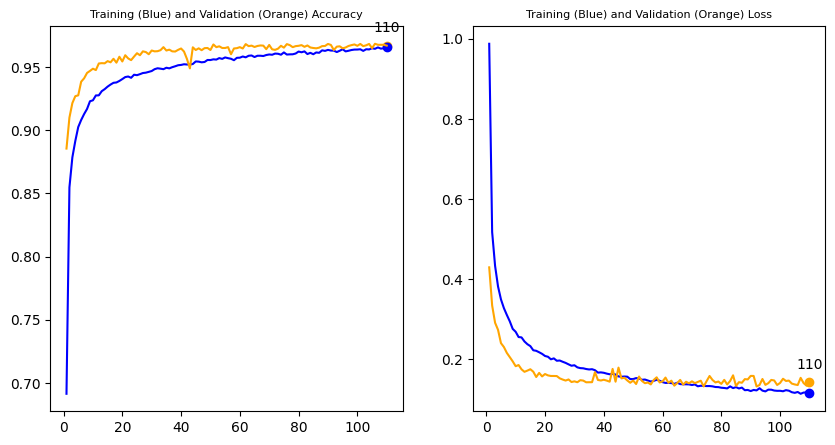

<Figure size 2000x1000 with 0 Axes>

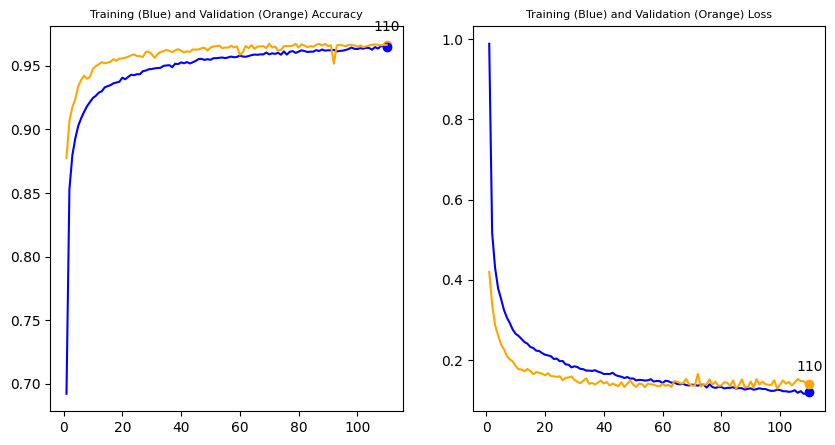

<Figure size 2000x1000 with 0 Axes>

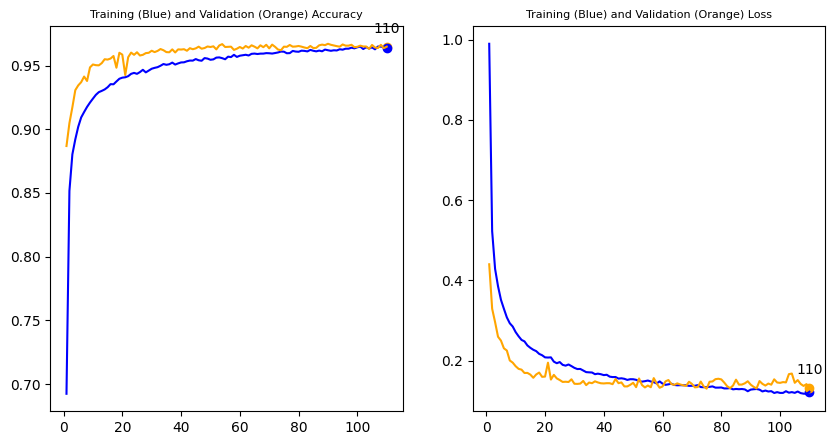

<Figure size 2000x1000 with 0 Axes>

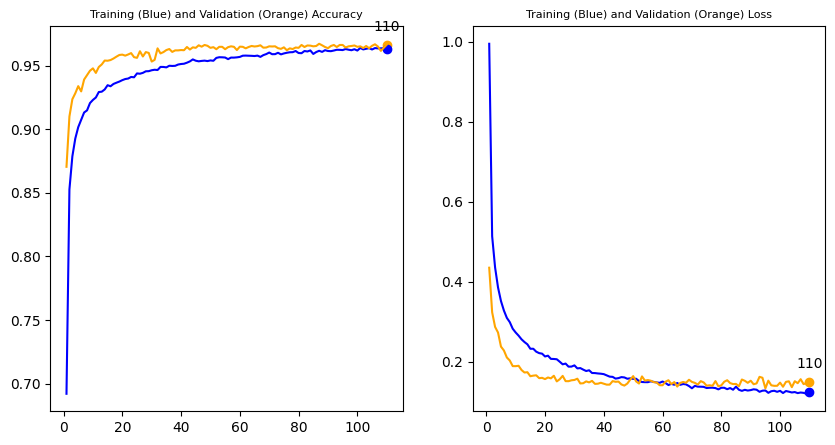

<Figure size 2000x1000 with 0 Axes>

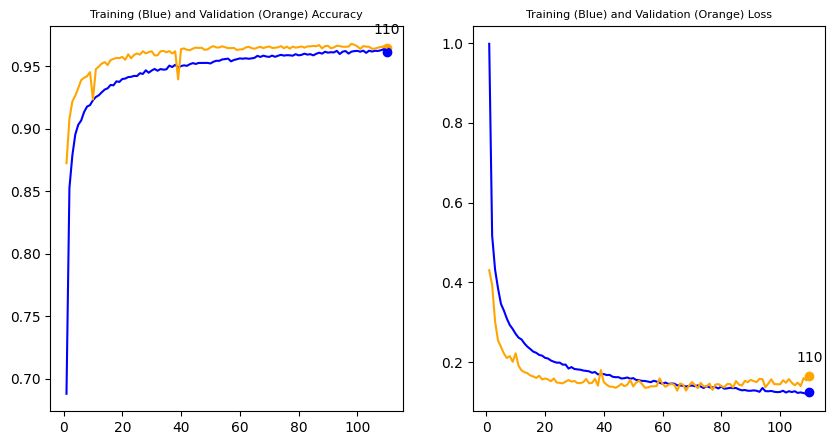

<Figure size 2000x1000 with 0 Axes>

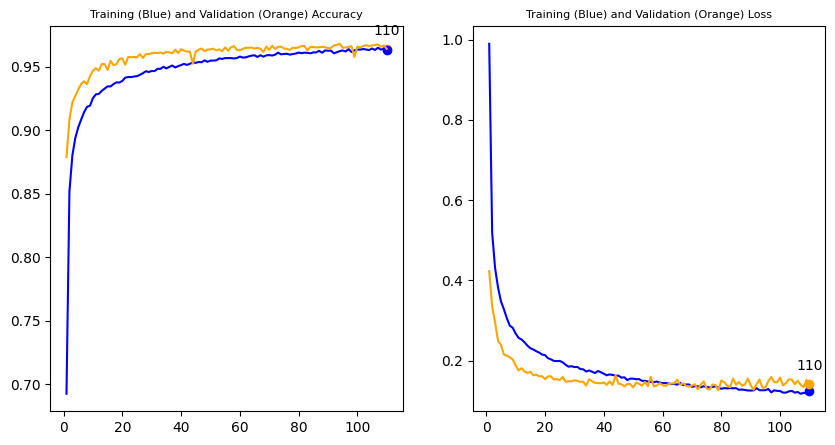

<Figure size 2000x1000 with 0 Axes>

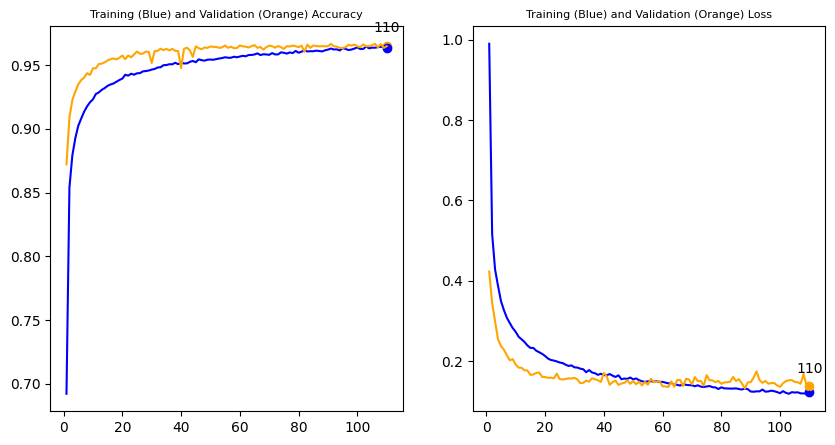

<Figure size 2000x1000 with 0 Axes>

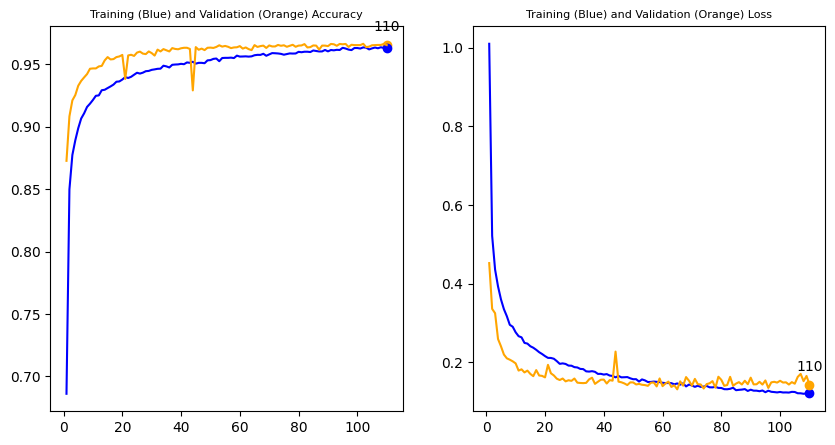

<Figure size 2000x1000 with 0 Axes>

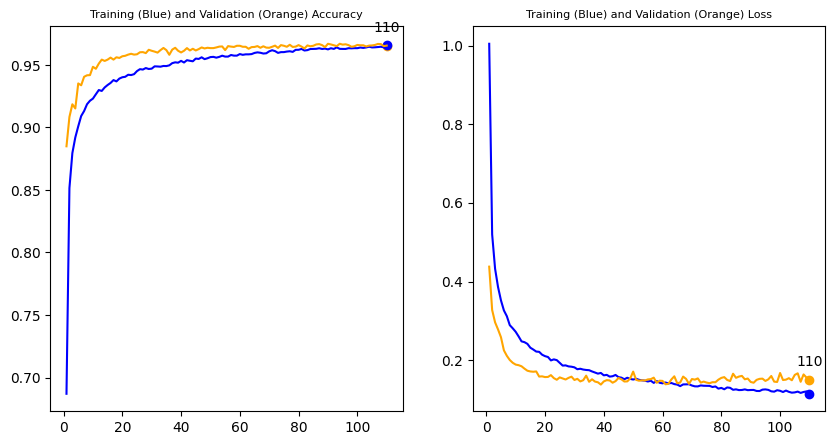

<Figure size 2000x1000 with 0 Axes>

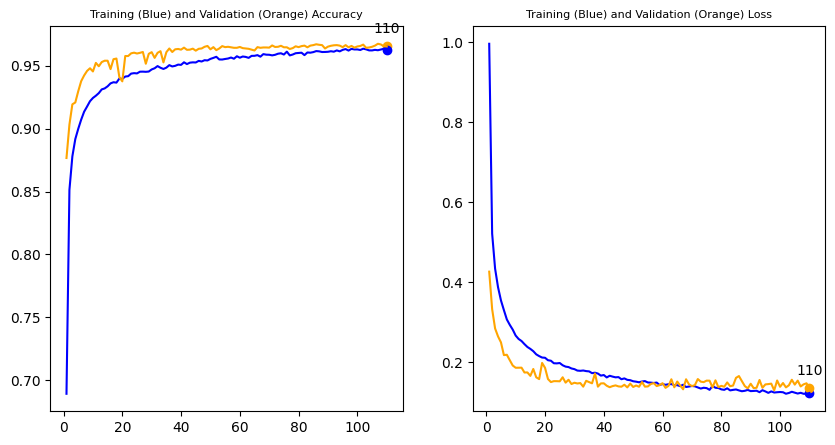

Group of Lambda-Value: 100


<Figure size 2000x1000 with 0 Axes>

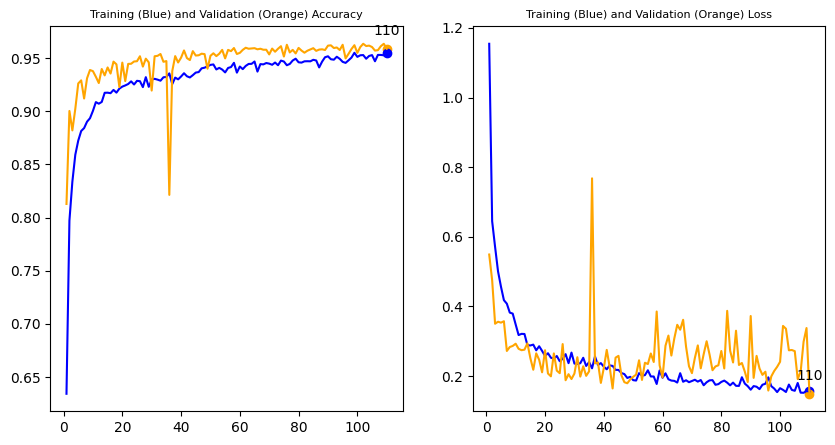

<Figure size 2000x1000 with 0 Axes>

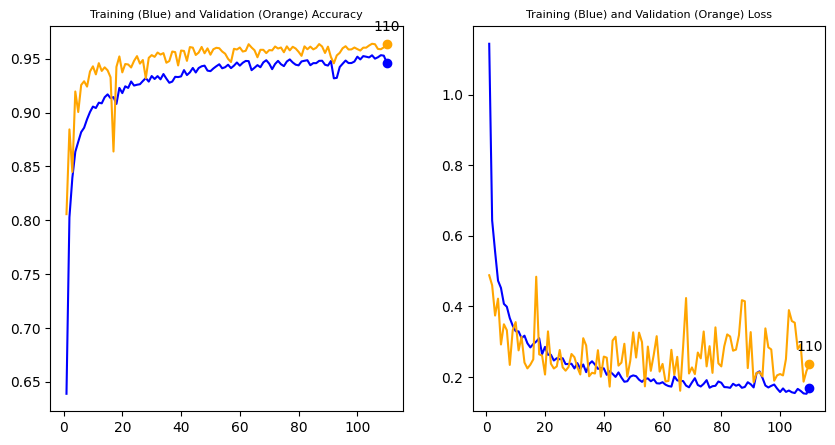

<Figure size 2000x1000 with 0 Axes>

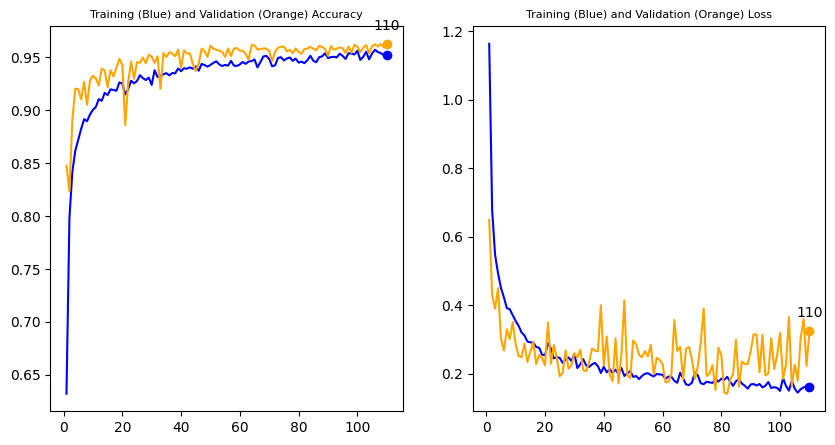

<Figure size 2000x1000 with 0 Axes>

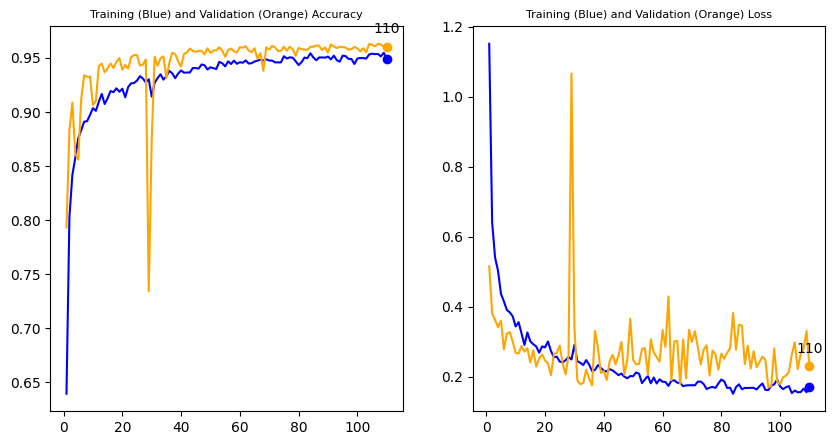

<Figure size 2000x1000 with 0 Axes>

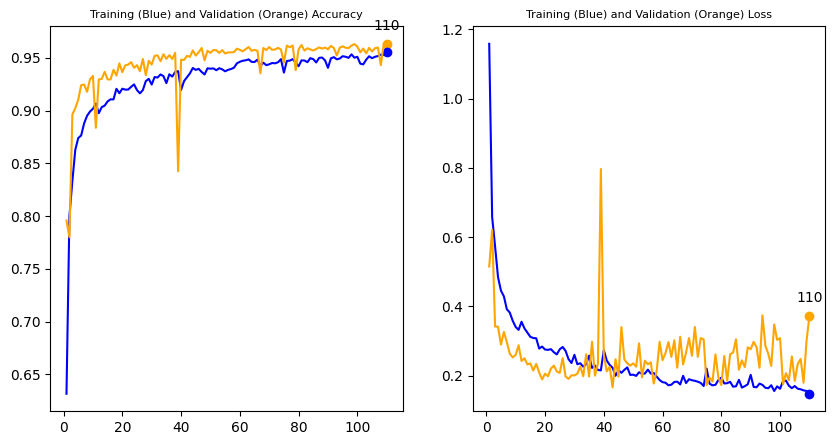

<Figure size 2000x1000 with 0 Axes>

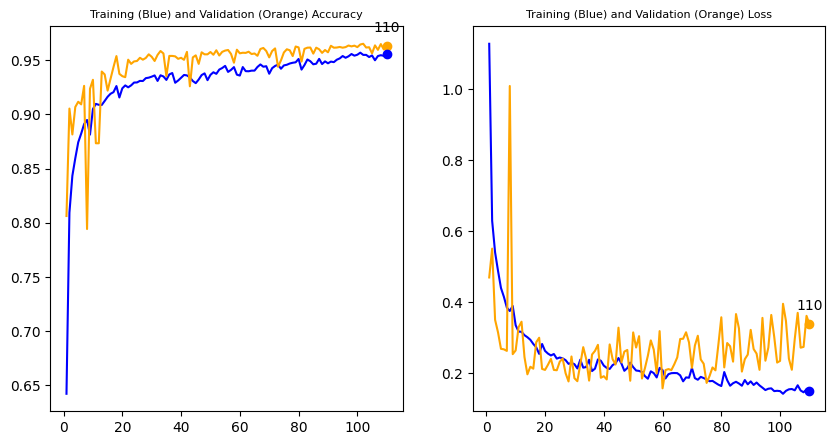

<Figure size 2000x1000 with 0 Axes>

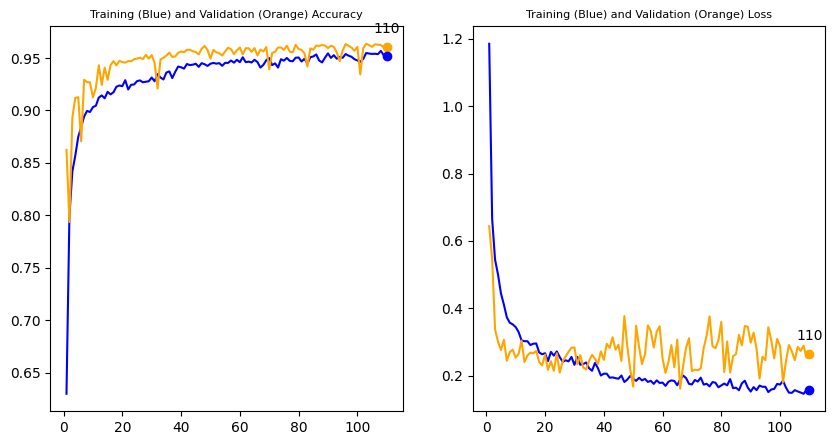

<Figure size 2000x1000 with 0 Axes>

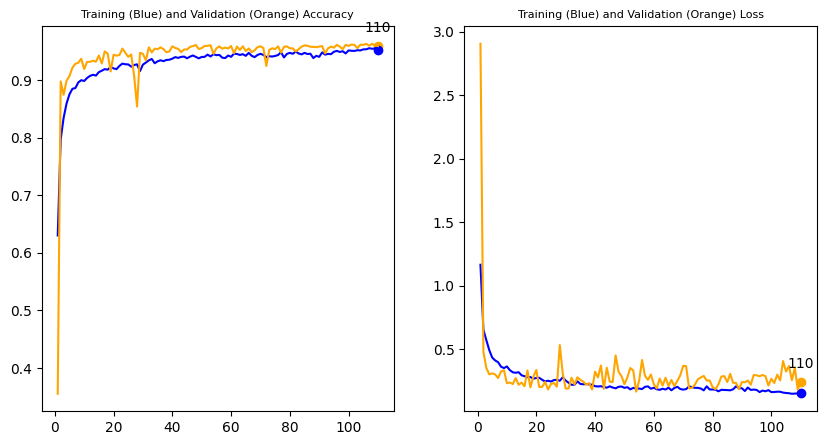

<Figure size 2000x1000 with 0 Axes>

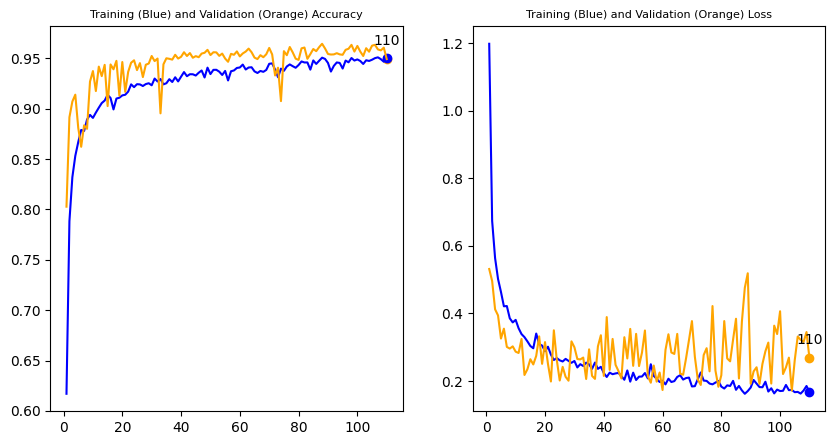

<Figure size 2000x1000 with 0 Axes>

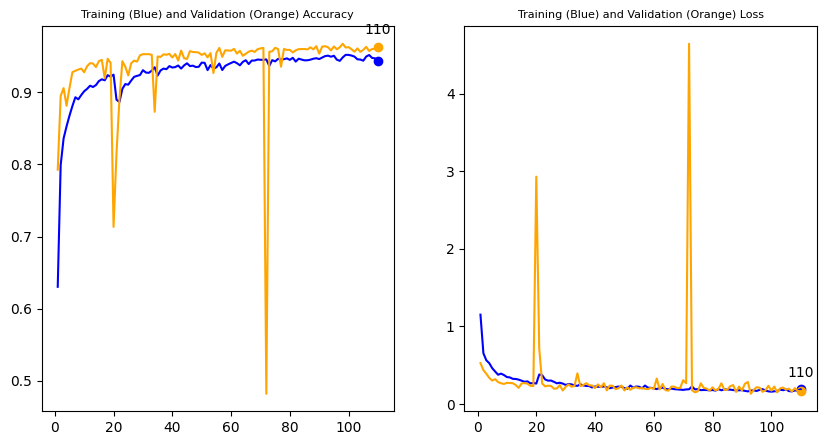

Group of Lambda-Value: 1000


<Figure size 2000x1000 with 0 Axes>

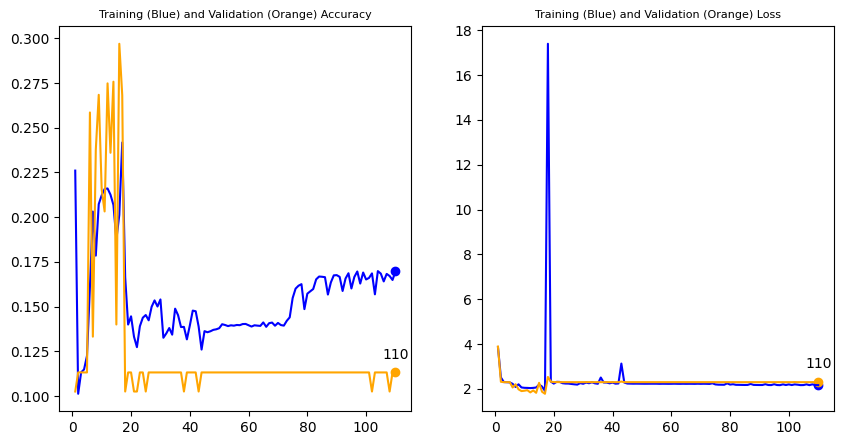

<Figure size 2000x1000 with 0 Axes>

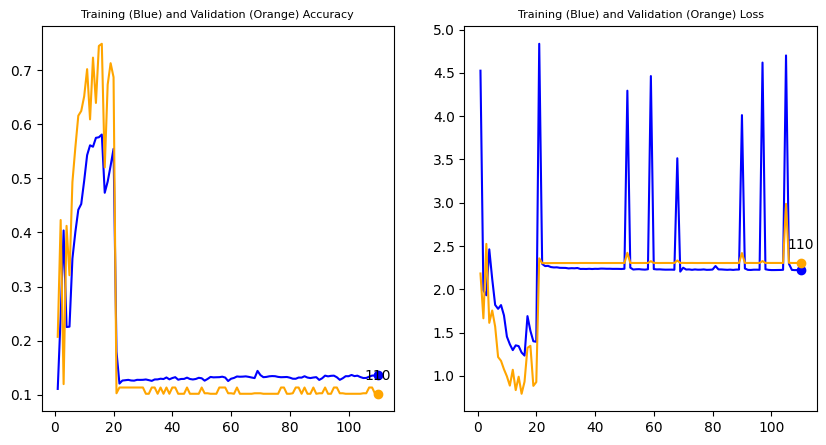

<Figure size 2000x1000 with 0 Axes>

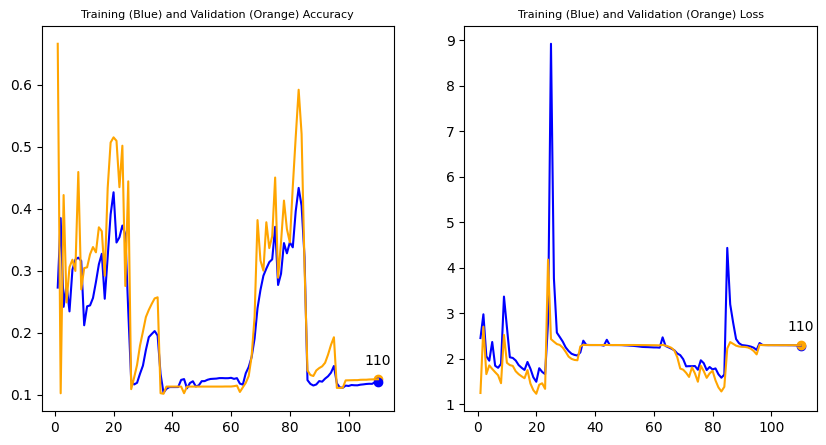

<Figure size 2000x1000 with 0 Axes>

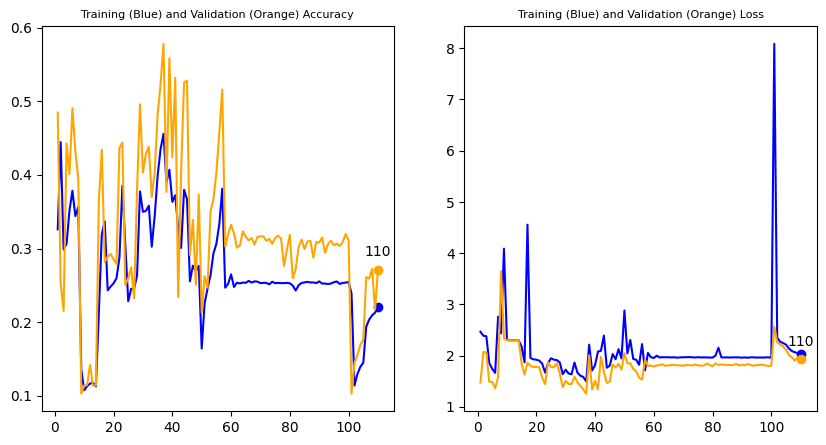

<Figure size 2000x1000 with 0 Axes>

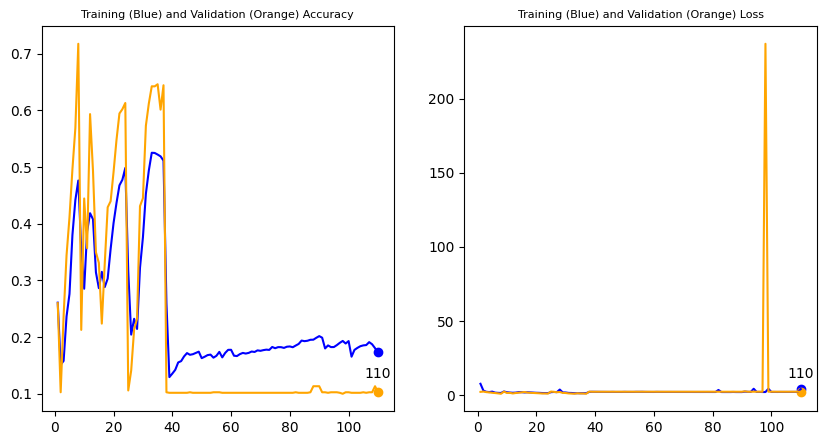

<Figure size 2000x1000 with 0 Axes>

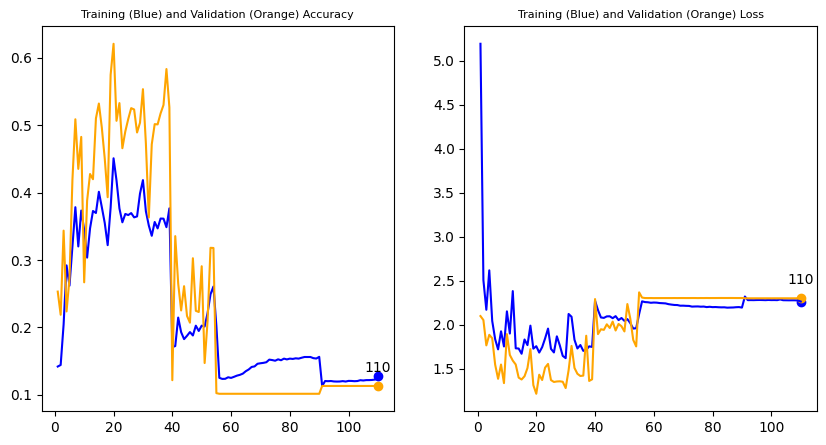

<Figure size 2000x1000 with 0 Axes>

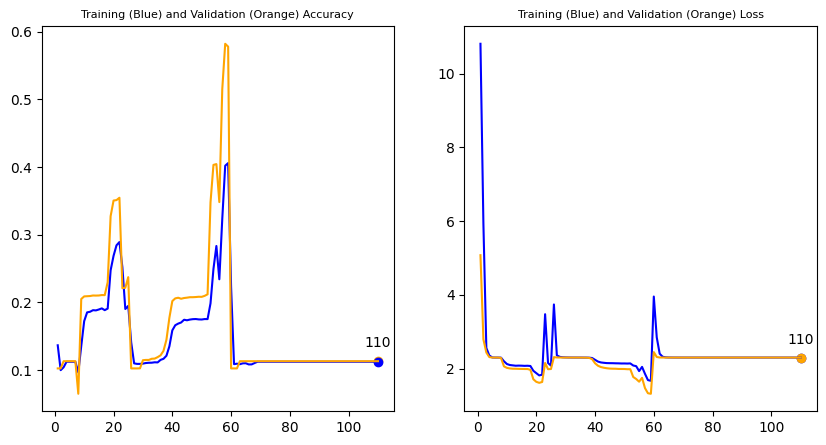

<Figure size 2000x1000 with 0 Axes>

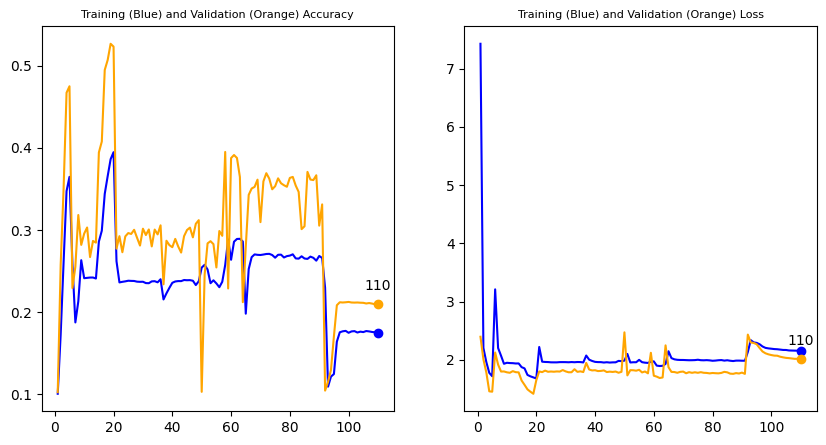

<Figure size 2000x1000 with 0 Axes>

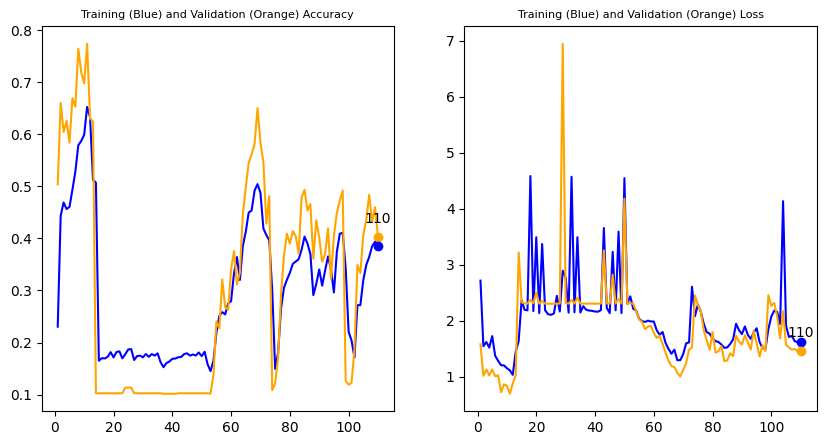

<Figure size 2000x1000 with 0 Axes>

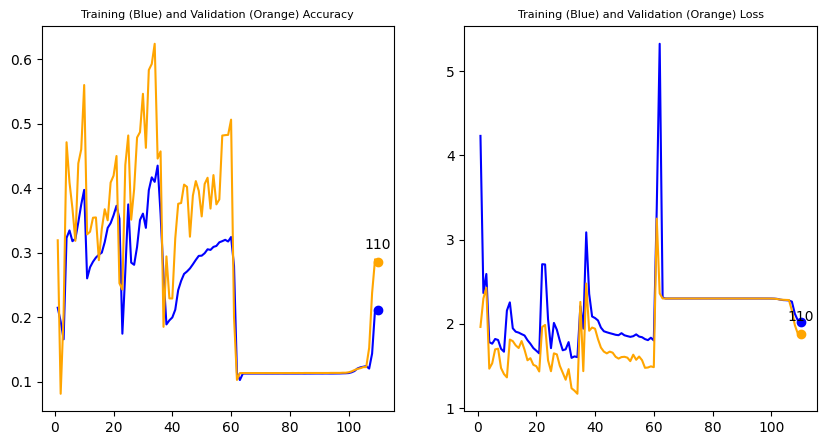

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import time
nb_epoch = 110
patience = 0
df.groupby("cost")

for x, group in df.groupby("cost"):
  # fig = plt.figure(figsize=(20, 10)) 
  # fig, ax = plt.subplots(1,2)
  print("Group of Lambda-Value:",   x)

  # group
  for item in group.model_history:
    plot_model_history_all(item)    
  plt.show()
  

In [11]:
df["model_history"][0].history.keys()


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', '9T_4P', '4T_9P', '0T_Acc', '1T_Acc', '2T_Acc', '3T_Acc', '4T_Acc', '5T_Acc', '6T_Acc', '7T_Acc', '8T_Acc', '9T_Acc', 'cm_per_epoch', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_notweighted'])

The plots  look very similar.  The loss values, even with shuffling, are nearly identical at least within 0.01 for the first three epochs of runs 1 and 2 (haven't checked all, but the plot makes it look like the runs are nearly identical)

In [12]:
df["model_history"][2].history["val_loss"][0] - df["model_history"][1].history["val_loss"][0]
df["model_history"][2].history["val_loss"][1] - df["model_history"][1].history["val_loss"][1]
df["model_history"][2].history["val_loss"][2] - df["model_history"][1].history["val_loss"][2]

0.008822590112686157

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


What is the highest misclassification?



0


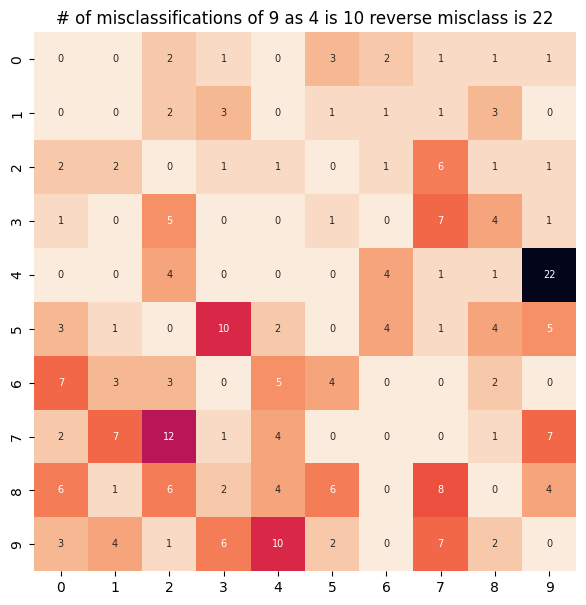

1


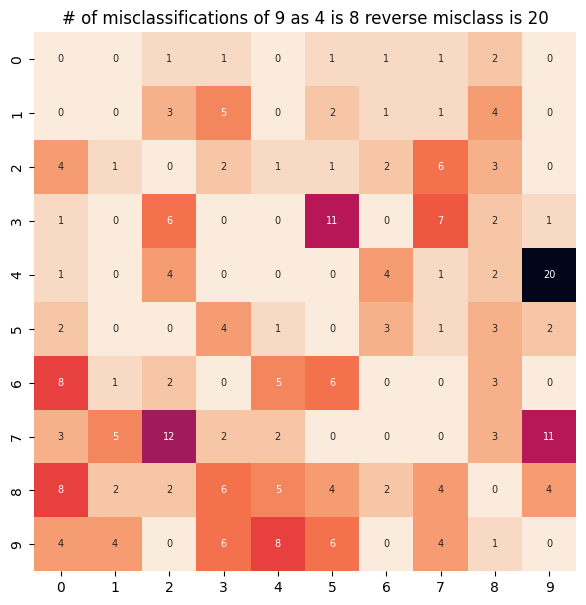

2


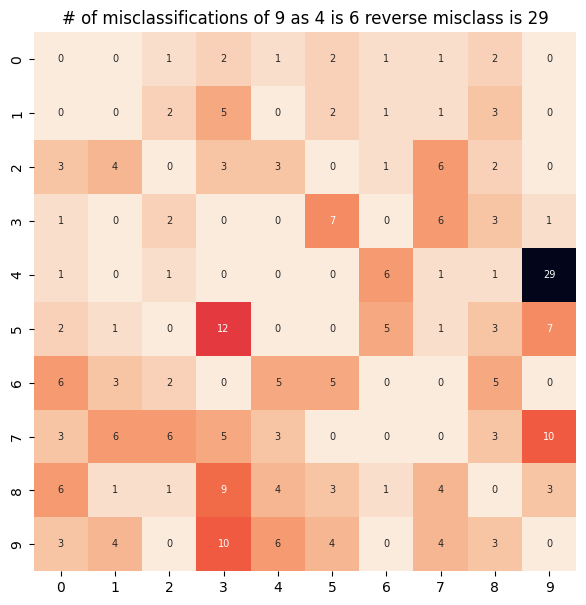

3


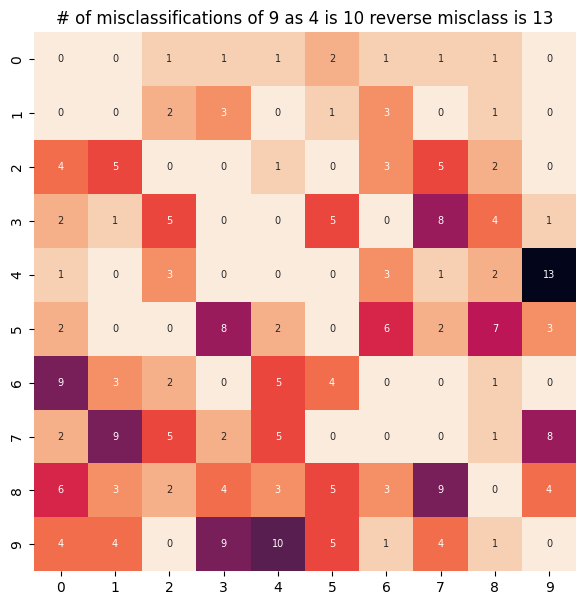

4


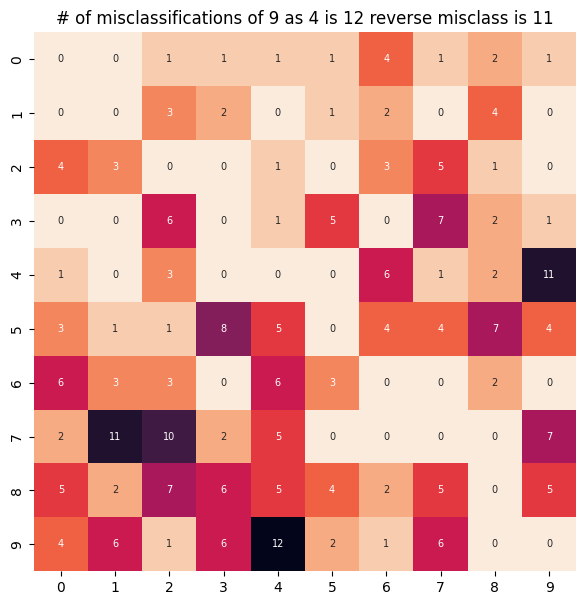

5


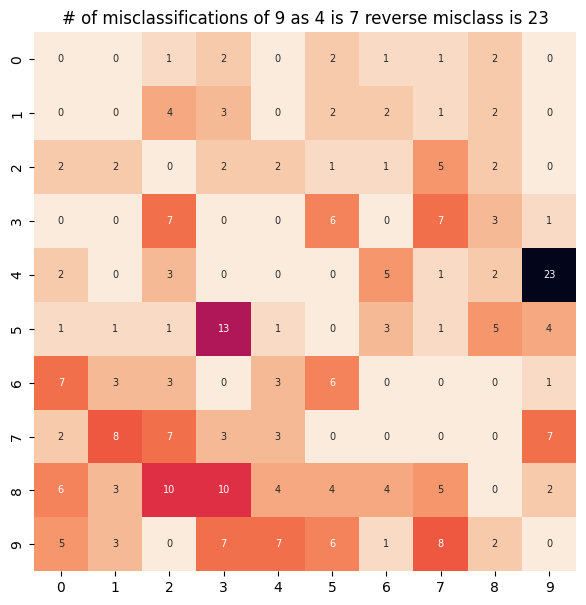

6


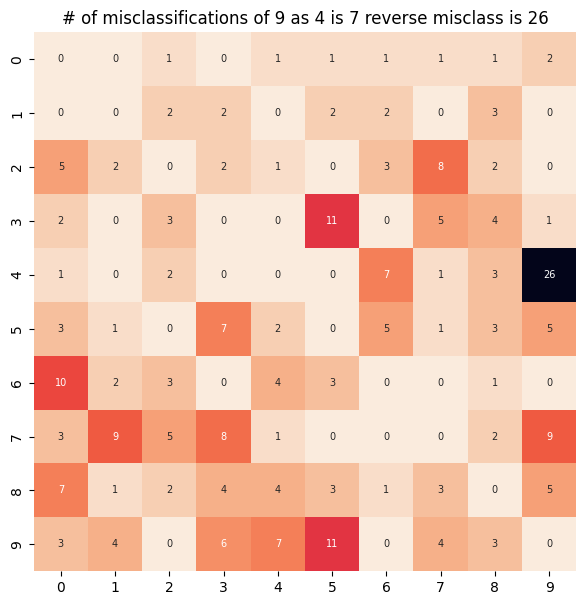

7


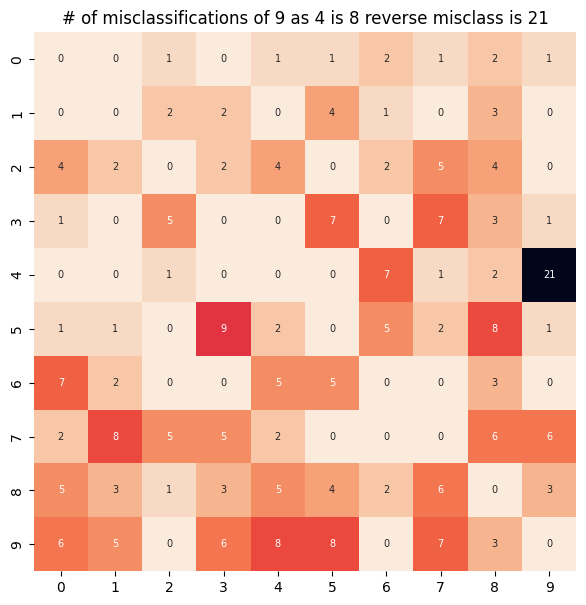

8


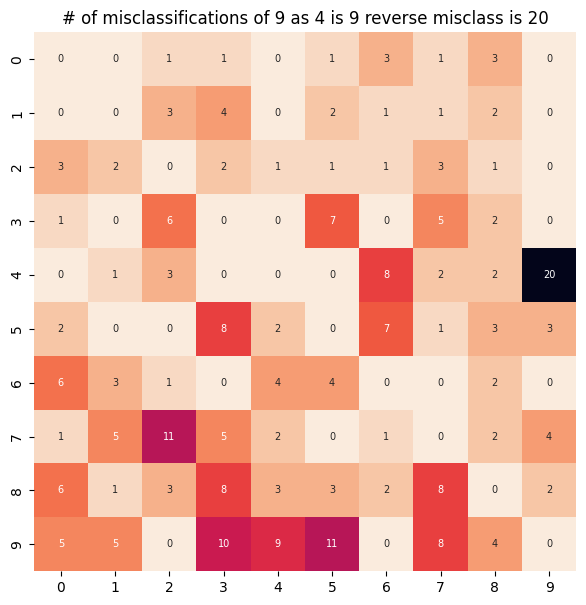

9


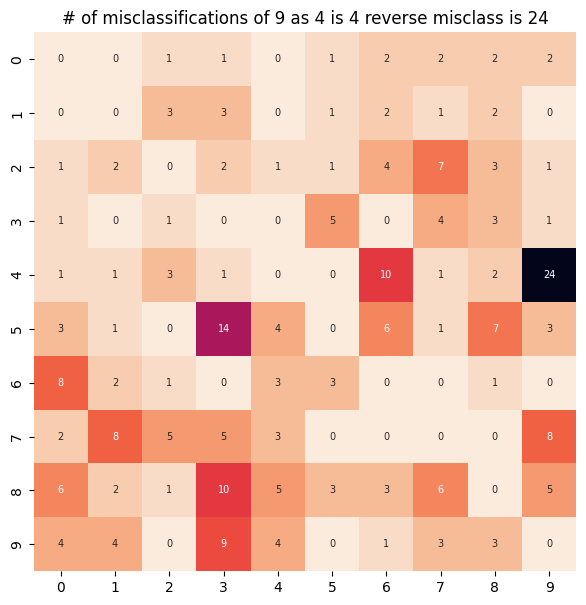

10


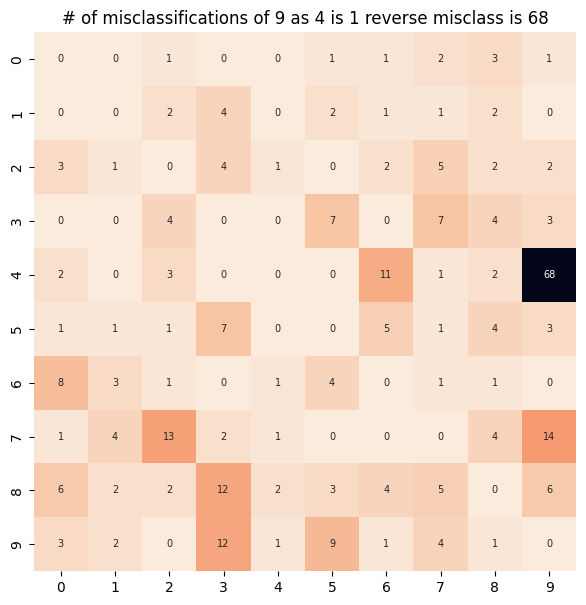

11


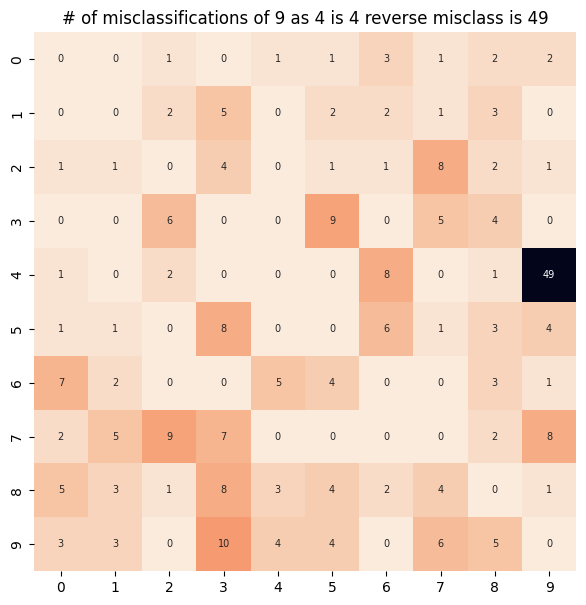

12


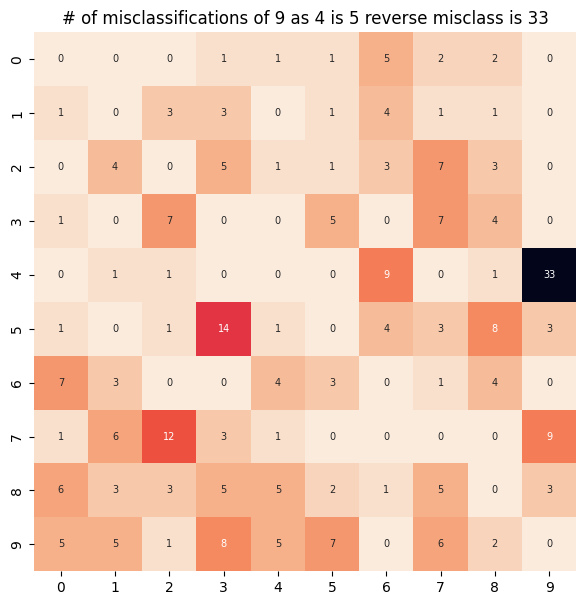

13


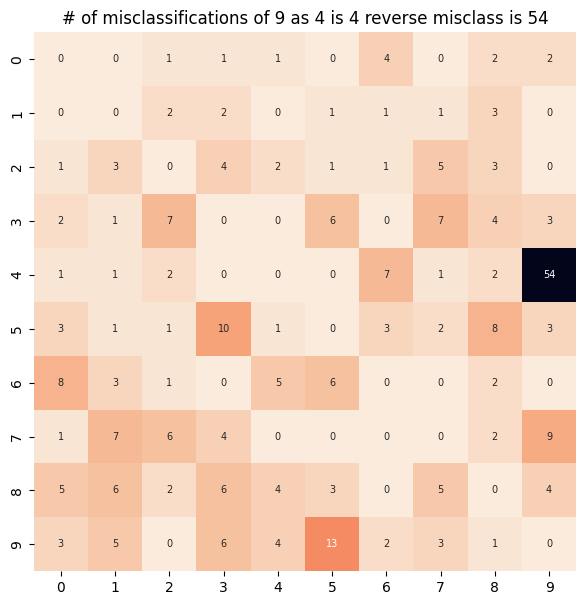

14


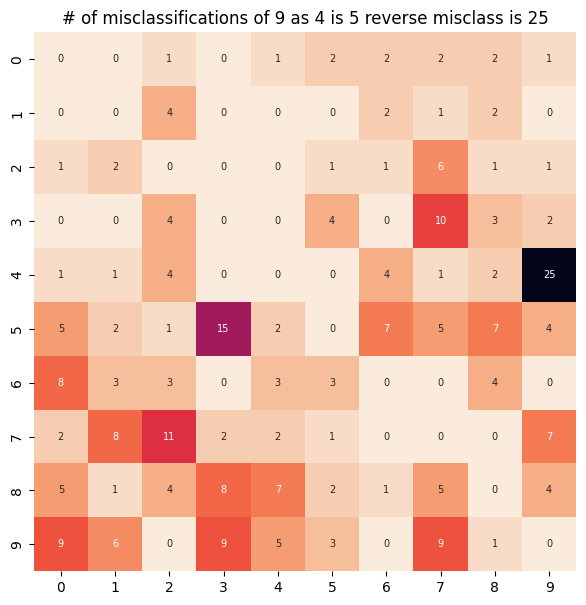

15


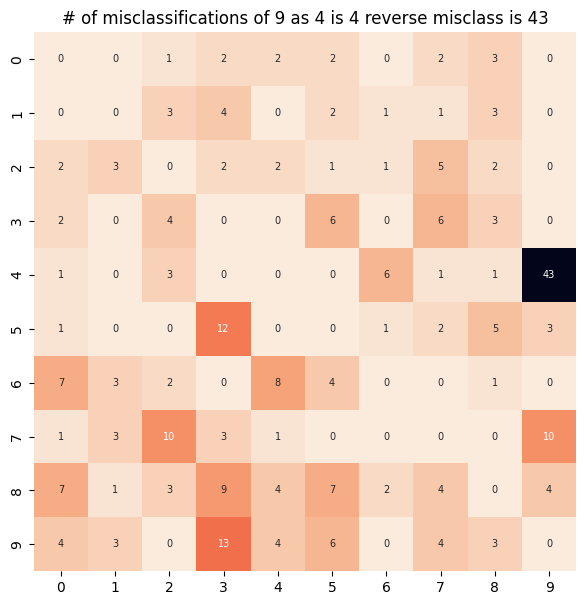

16


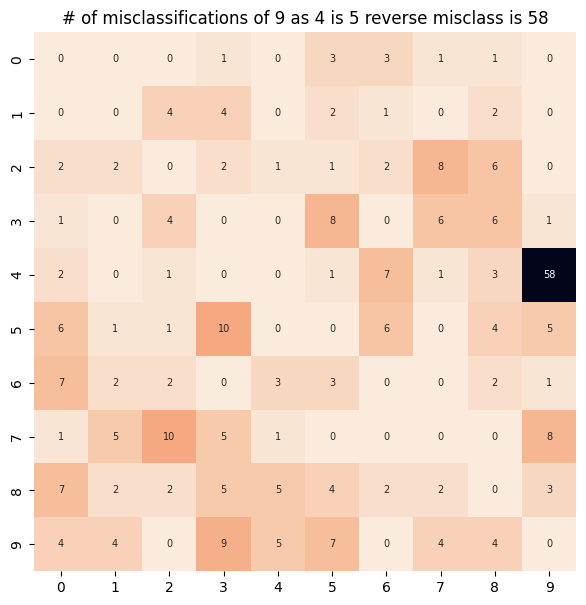

17


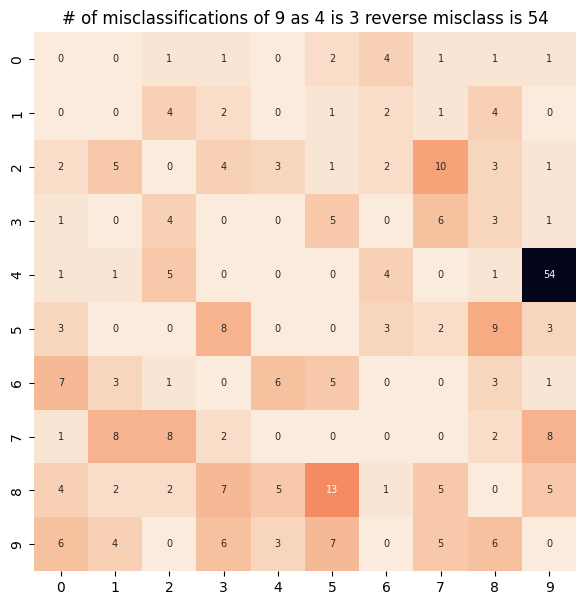

18


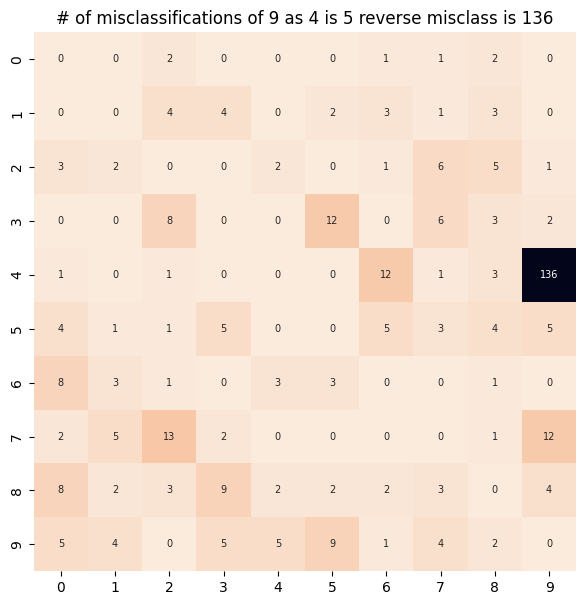

19


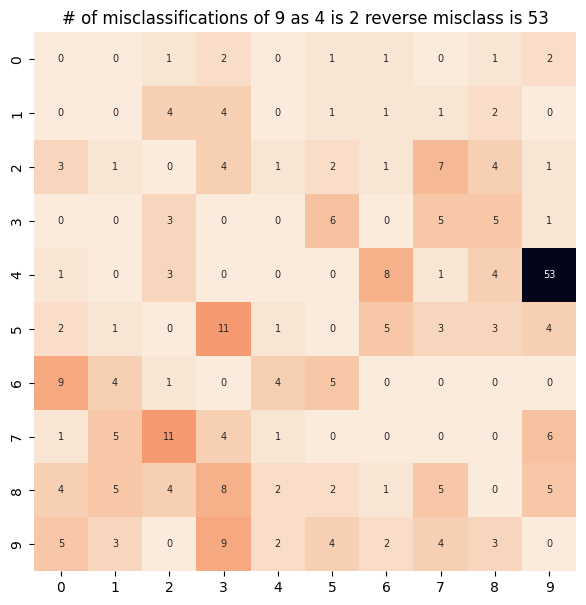

20


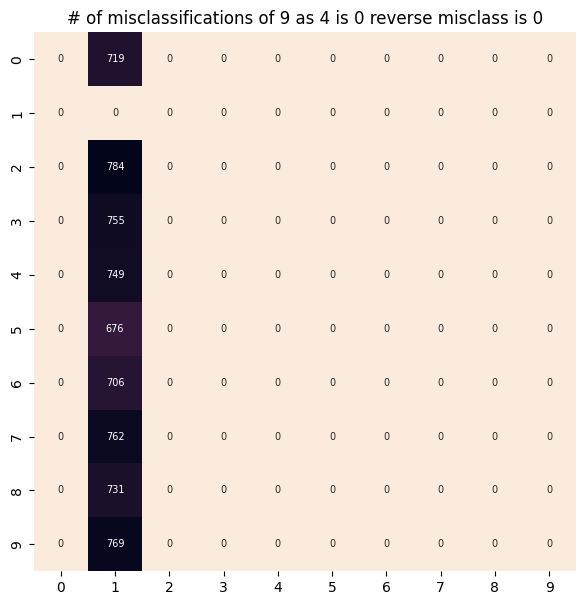

21


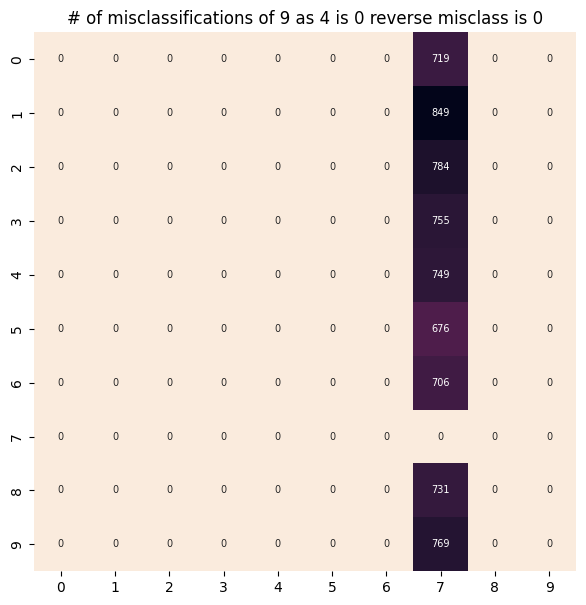

22


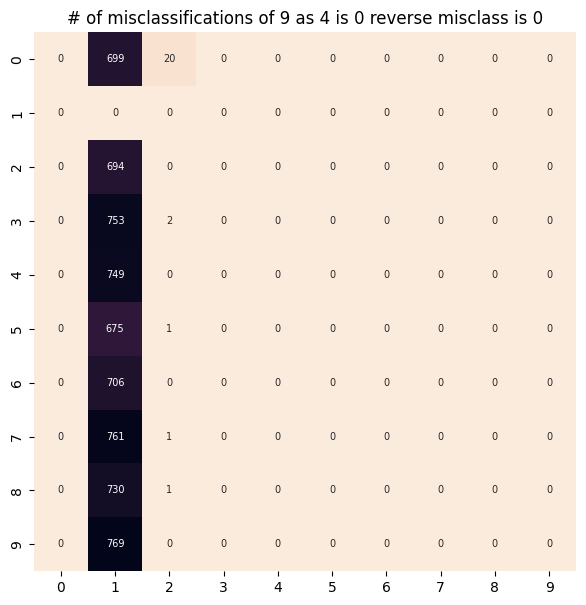

23


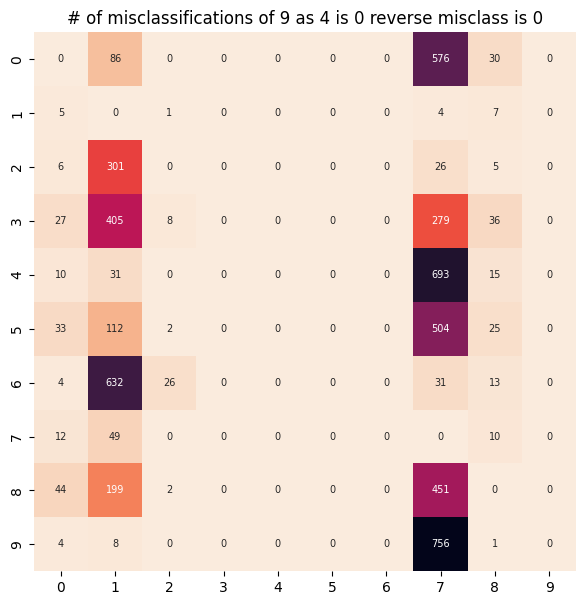

24


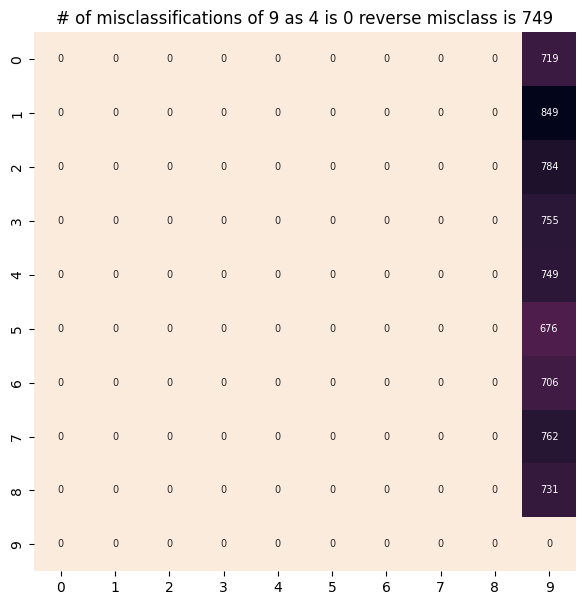

25


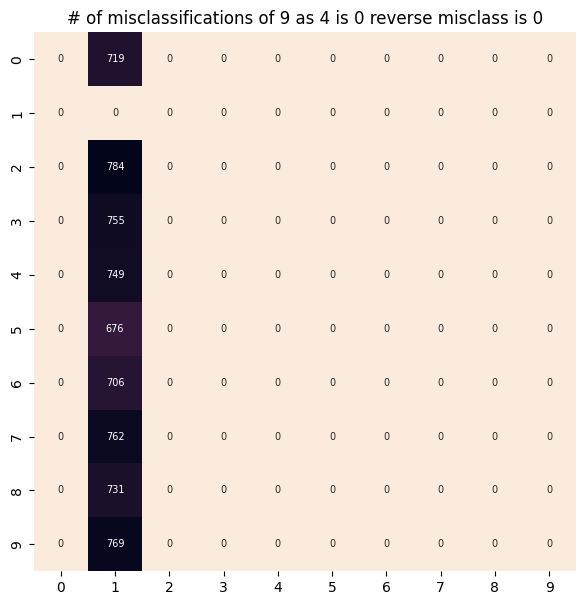

26


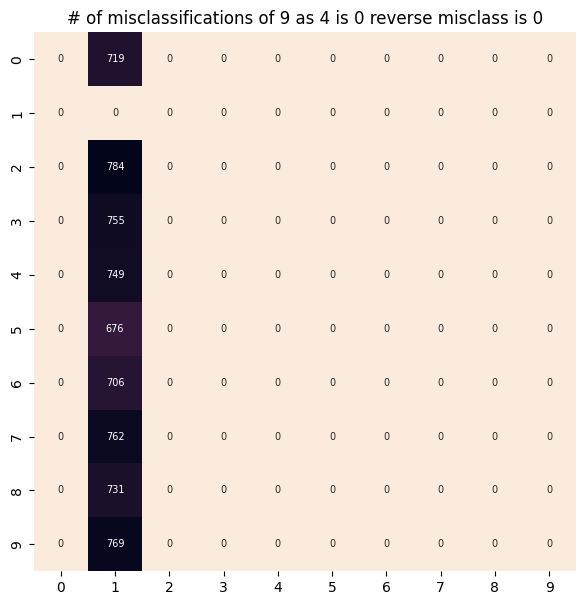

27


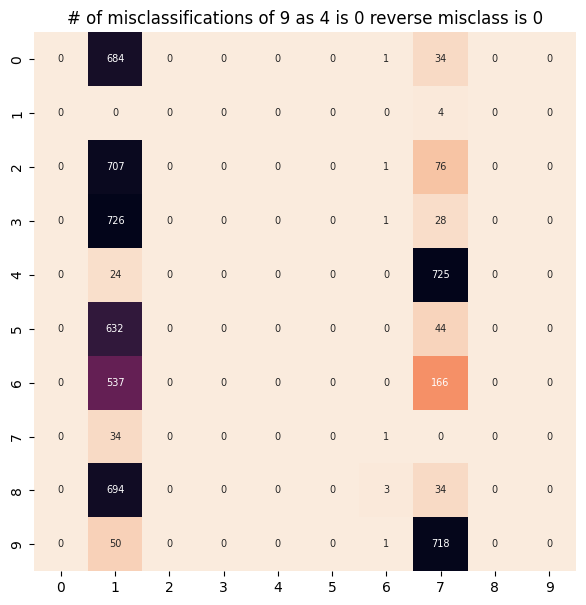

28


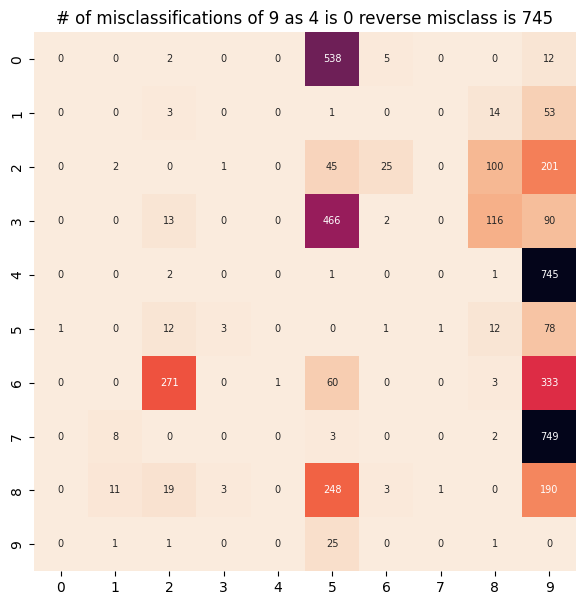

29


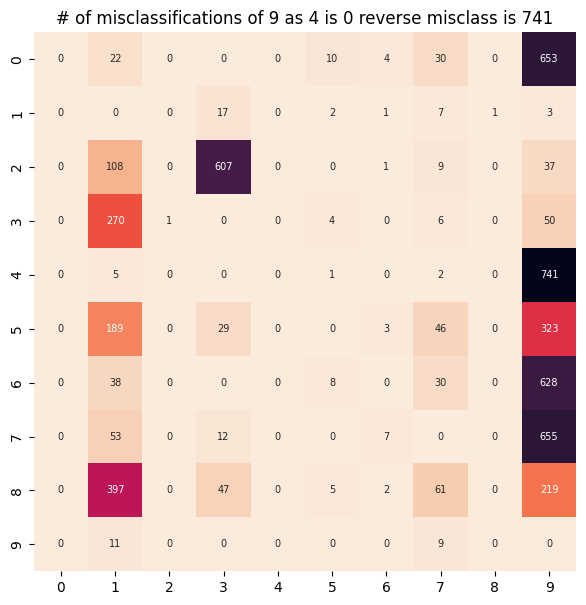

In [14]:
for i in range(len(df["model_history"])):
  print(i)
  cm = df["model_history"][i].history["cm_per_epoch"][-1].reshape((10,10))
  # cm = cm.reshape((10,10))
  

  # Create figure and axes
  fig, ax = plt.subplots(figsize=(7, 7))


  cm3_wodiag = pd.DataFrame(cm*(np.ones((10,10)) - np.eye(10)))
  plt.xlabel('Predicted Class')
  plt.ylabel('True Class')
  plt.title('# of misclassifications of 9 as 4 is '+str(cm[9][4]) + ' reverse misclass is ' + str(cm[4][9])  ) 
  sns.heatmap(cm3_wodiag, annot=True, annot_kws={"size": 7},  fmt='g', cmap=sns.cm.rocket_r, cbar=False) # font size
  plt.show()




  
  

Average Misclassification Confusion Plot

In [15]:
# cm_sum = 0

# for i in range(len(df["model_history"])):
#   # print(i)
#   cm_sum += df["model_history"][i].history["cm_per_epoch"][-1].reshape((10,10))
#   # print(cm_sum)

# cm_average = cm_sum/(len(df["model_history"]))
# # print(cm_average)

# # Create figure and axes
# fig, ax = plt.subplots(figsize=(7, 7))


# cm3_wodiag = pd.DataFrame(cm_average*(np.ones((10,10)) - np.eye(10)))
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('# of Average misclassifications of 9 as 4 is '+str(cm3_wodiag[4][9]) + ' reverse misclass is ' + str(cm3_wodiag[9][4])  ) 
# sns.heatmap(cm3_wodiag, annot=True, annot_kws={"size": 7},  fmt='.1f', cmap=sns.cm.rocket_r, cbar=False) # font size
# plt.show()


# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('# of Average misclassifications of 9 as 4 is '+str(cm_average[9][4]) + ' reverse misclass is ' + str(cm_average[4][9]) ) 
# sns.heatmap(cm_average, annot=True, annot_kws={"size": 7},  fmt='.1f', cmap=sns.cm.rocket_r, cbar=False) # font size
# plt.show()


# #The notation for digging into a dataframe versus a numpy array is reversed / its horribly confusing/ but it is  listed above correctly




ImportLibraries_DefineFunctions.py:187: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

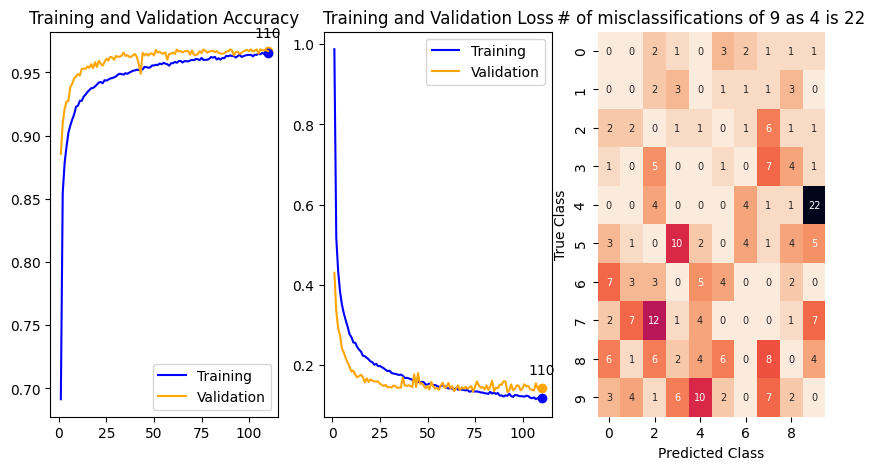

<Figure size 2000x1000 with 0 Axes>

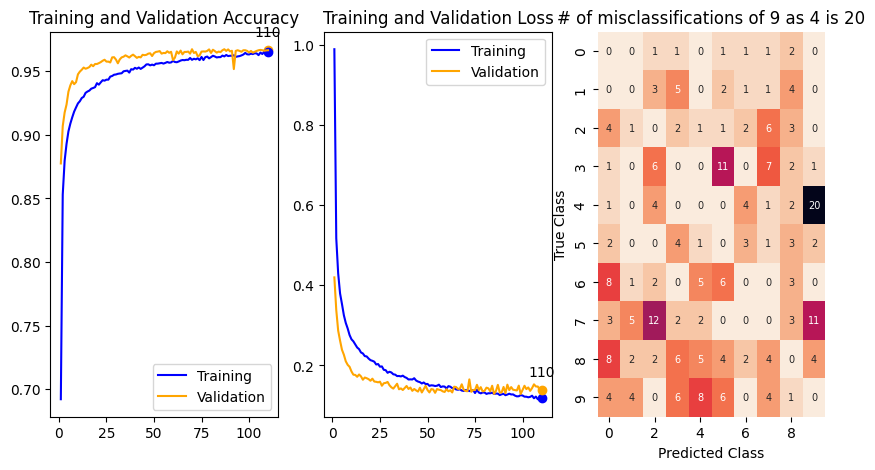

<Figure size 2000x1000 with 0 Axes>

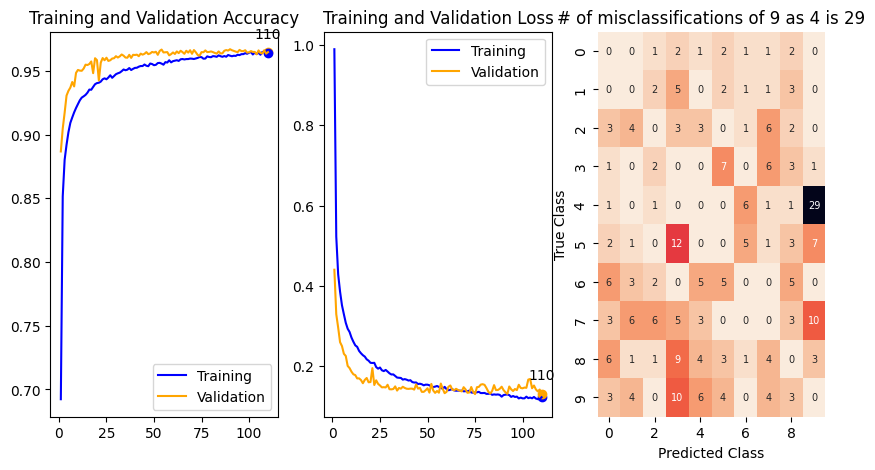

<Figure size 2000x1000 with 0 Axes>

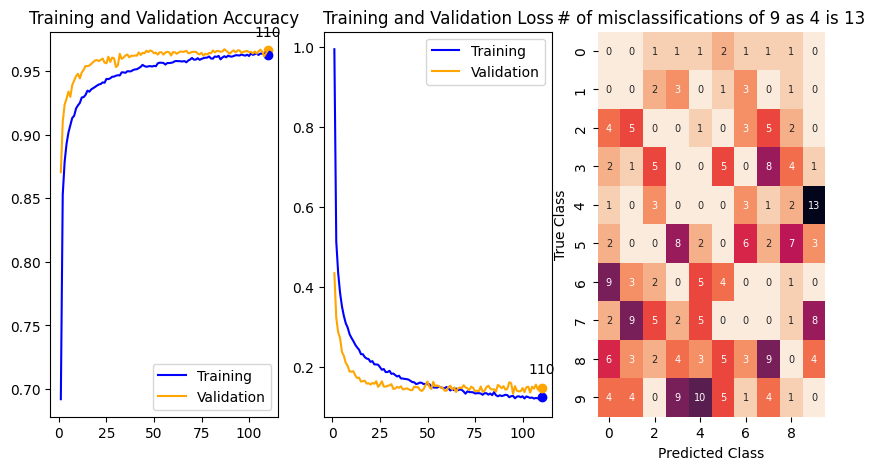

<Figure size 2000x1000 with 0 Axes>

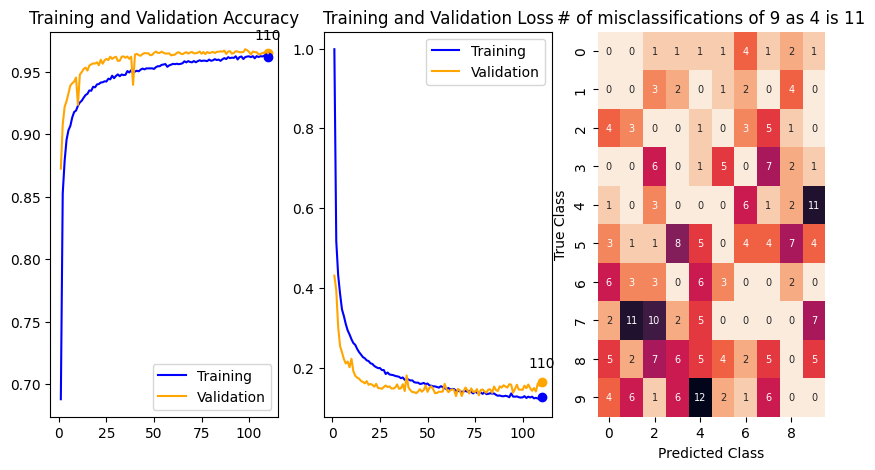

<Figure size 2000x1000 with 0 Axes>

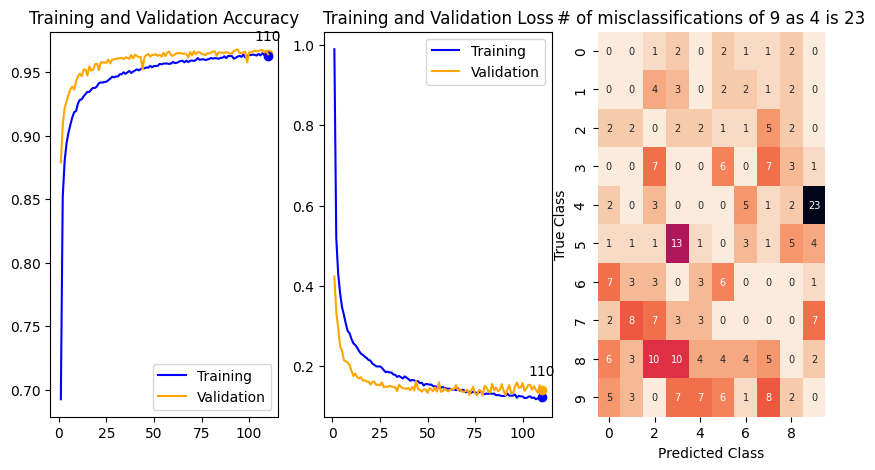

<Figure size 2000x1000 with 0 Axes>

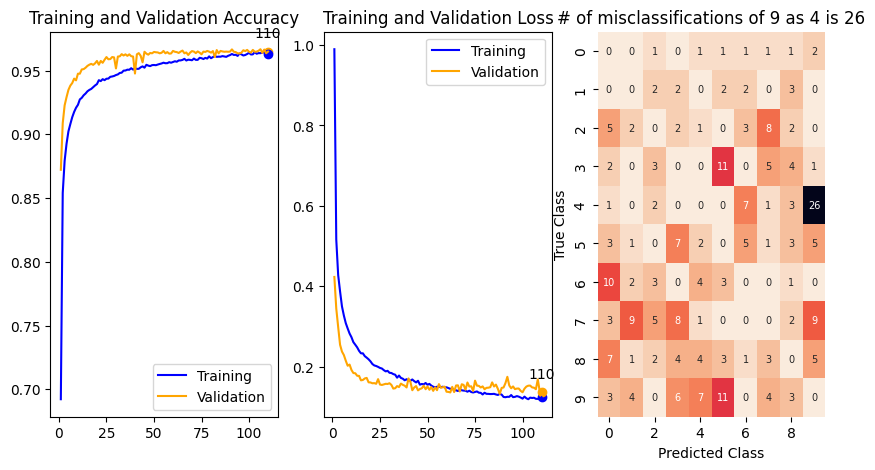

<Figure size 2000x1000 with 0 Axes>

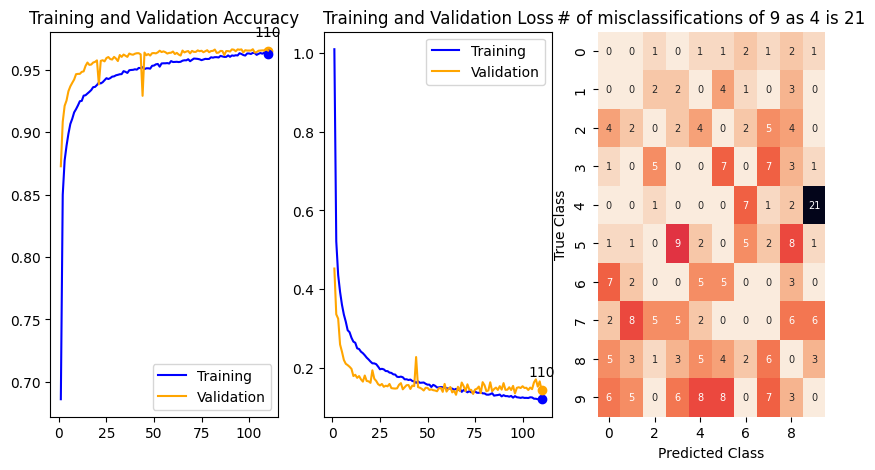

<Figure size 2000x1000 with 0 Axes>

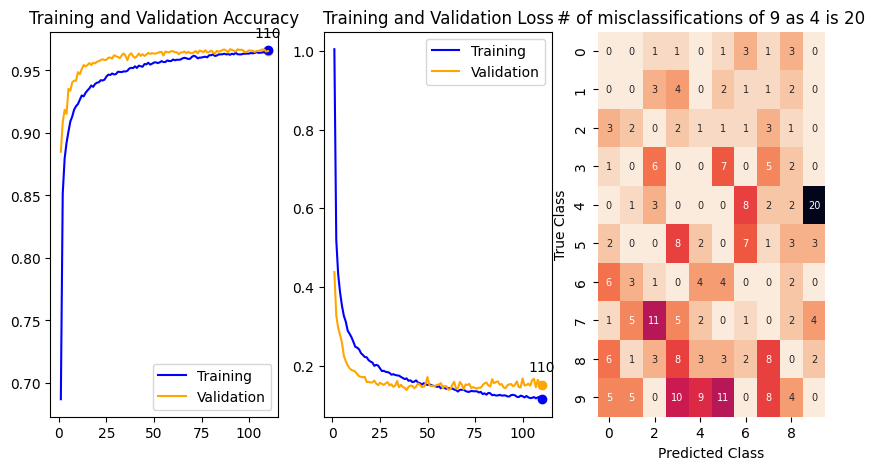

<Figure size 2000x1000 with 0 Axes>

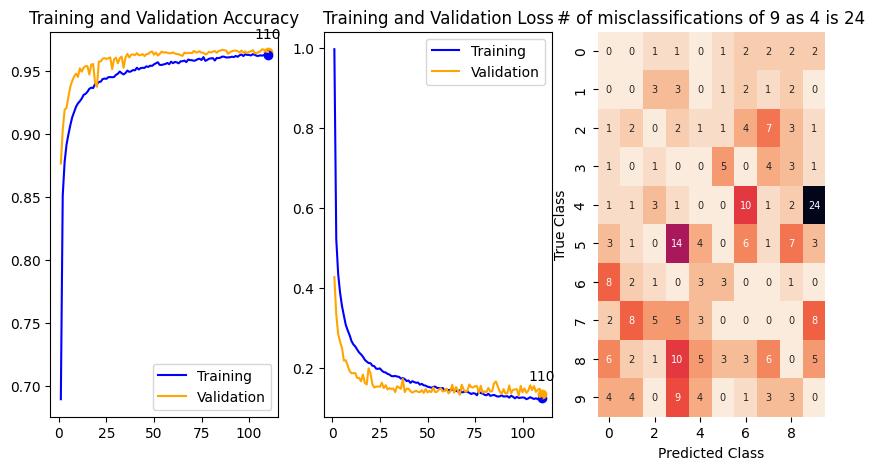

<Figure size 2000x1000 with 0 Axes>

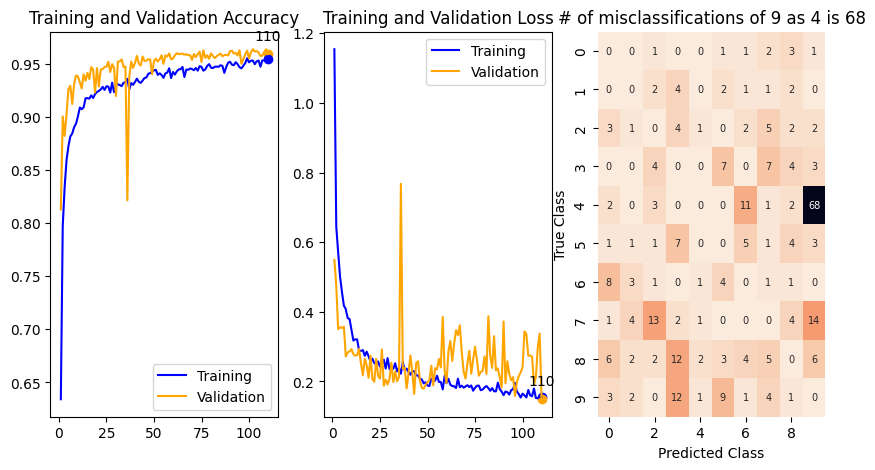

<Figure size 2000x1000 with 0 Axes>

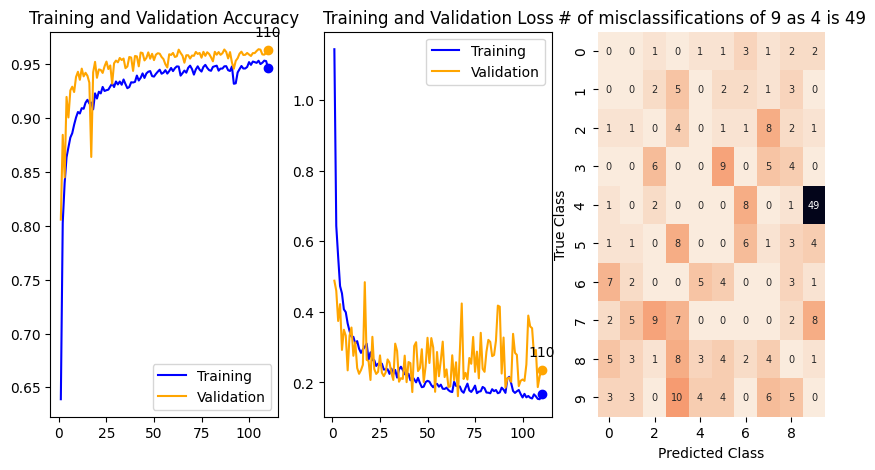

<Figure size 2000x1000 with 0 Axes>

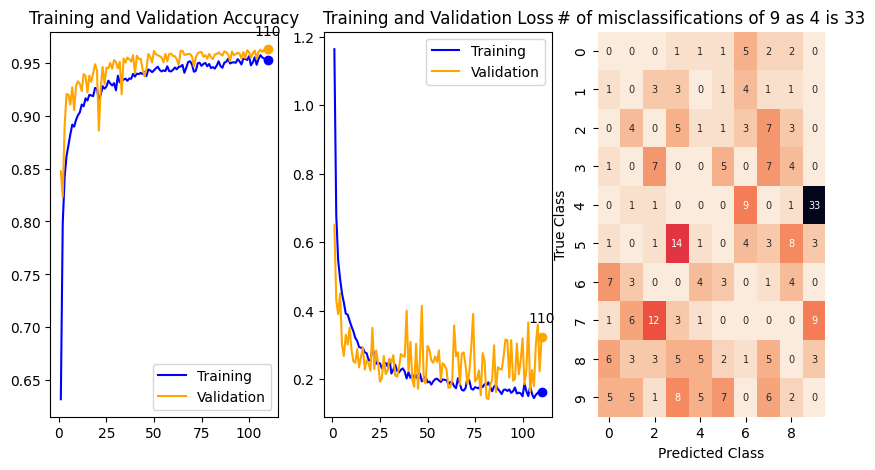

<Figure size 2000x1000 with 0 Axes>

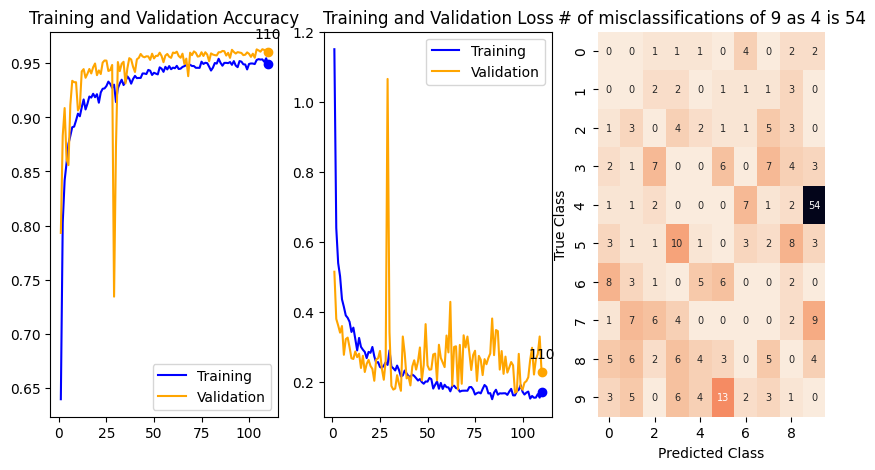

<Figure size 2000x1000 with 0 Axes>

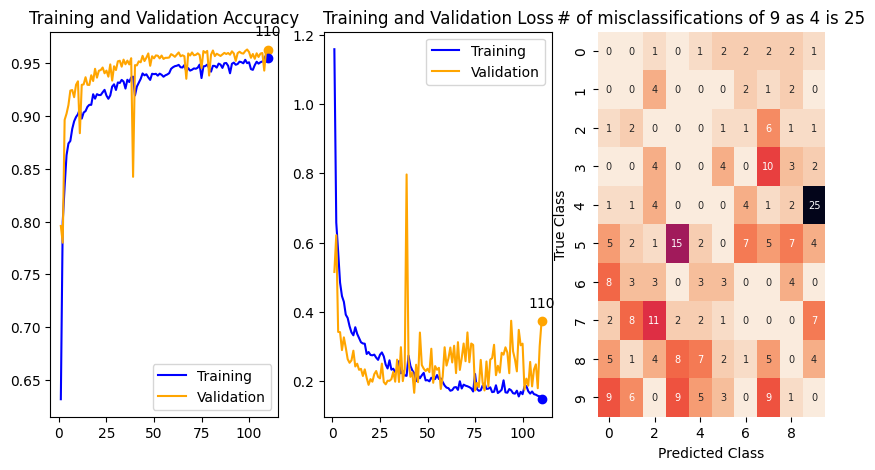

<Figure size 2000x1000 with 0 Axes>

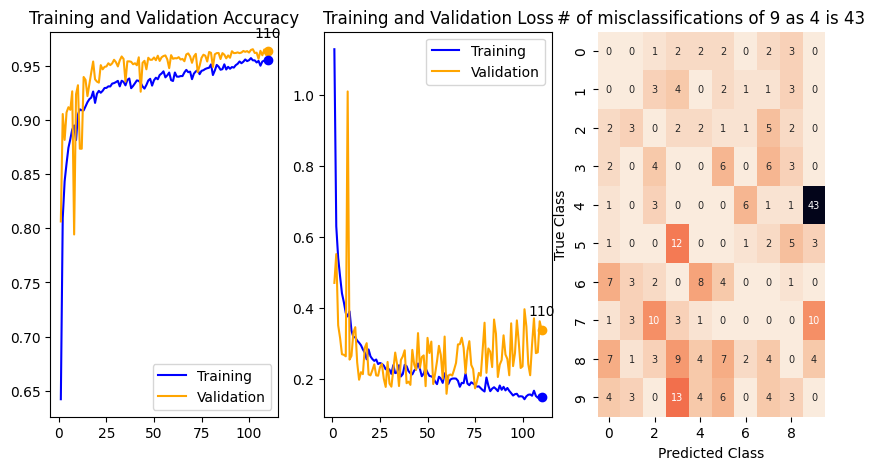

<Figure size 2000x1000 with 0 Axes>

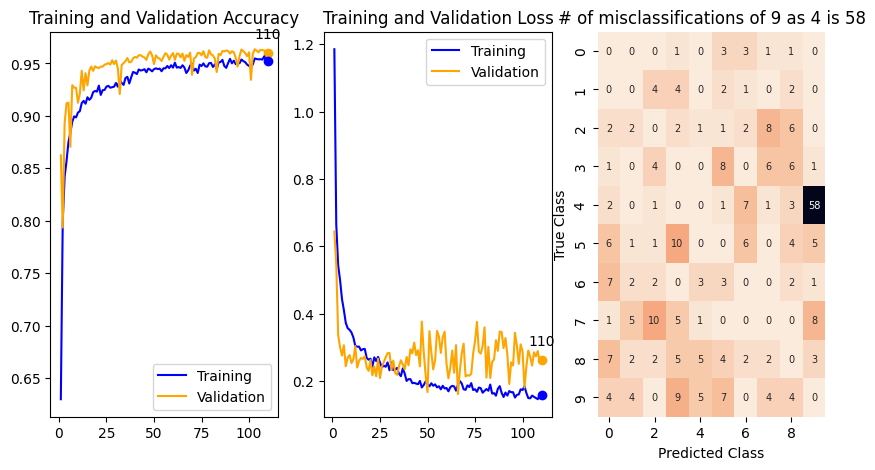

<Figure size 2000x1000 with 0 Axes>

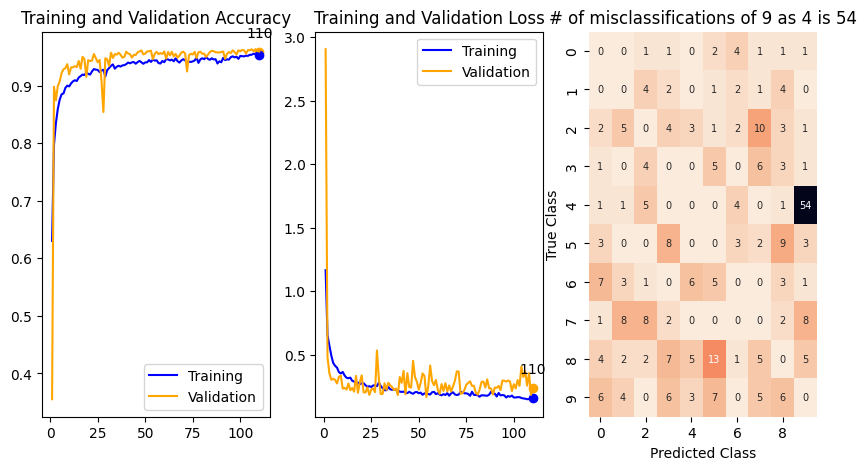

<Figure size 2000x1000 with 0 Axes>

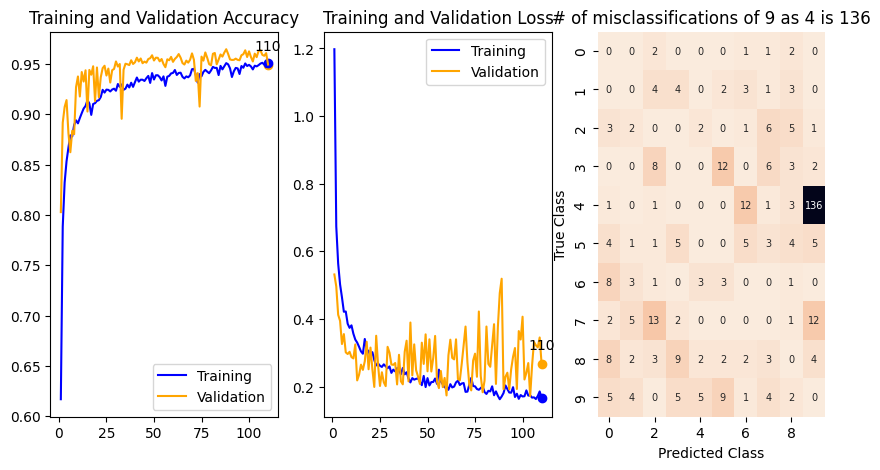

<Figure size 2000x1000 with 0 Axes>

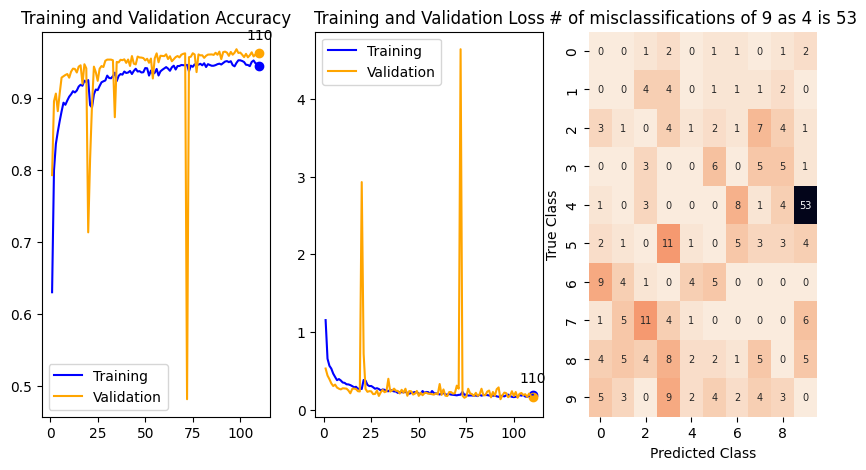

<Figure size 2000x1000 with 0 Axes>

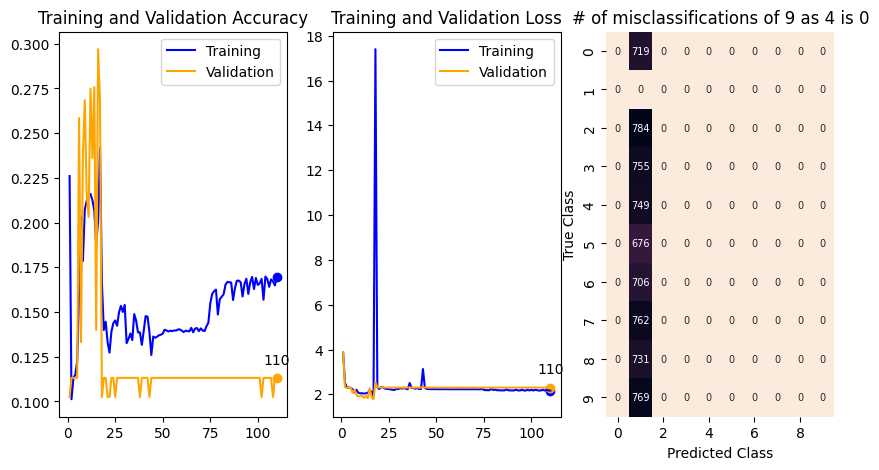

<Figure size 2000x1000 with 0 Axes>

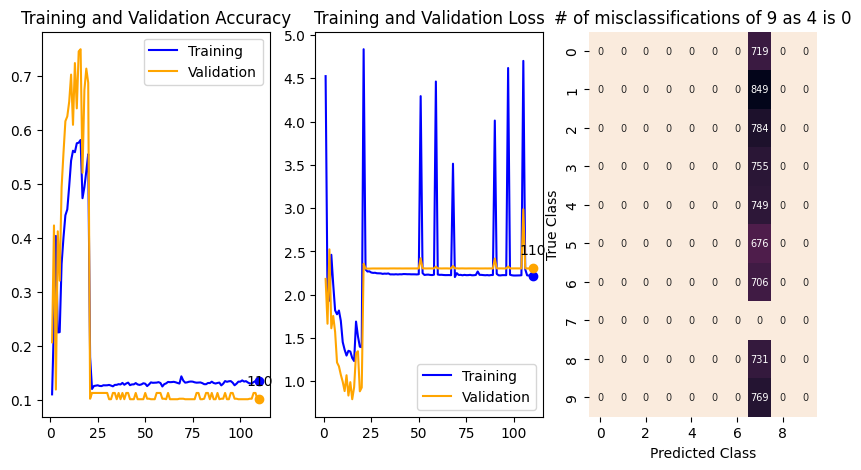

<Figure size 2000x1000 with 0 Axes>

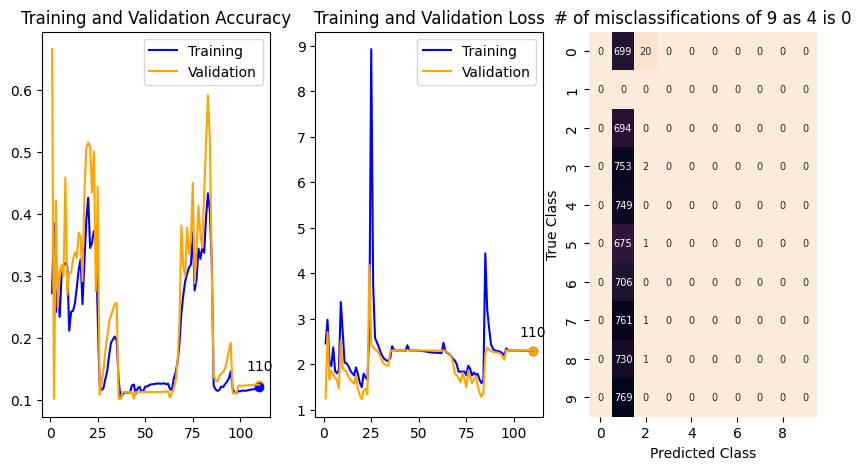

<Figure size 2000x1000 with 0 Axes>

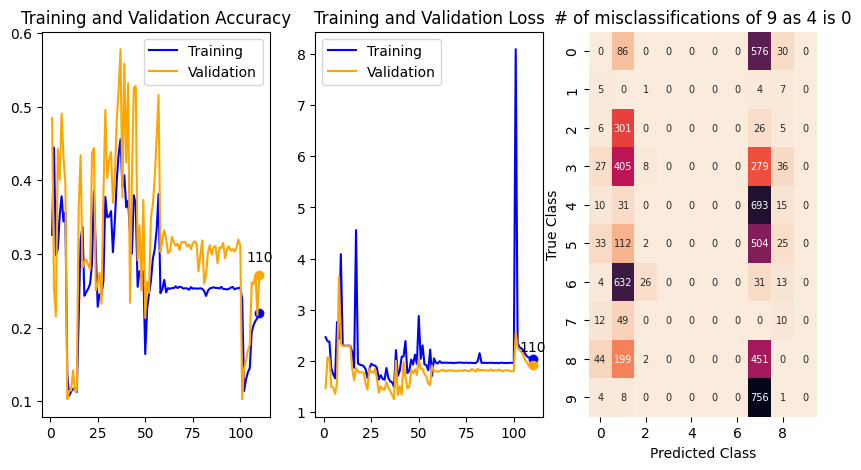

<Figure size 2000x1000 with 0 Axes>

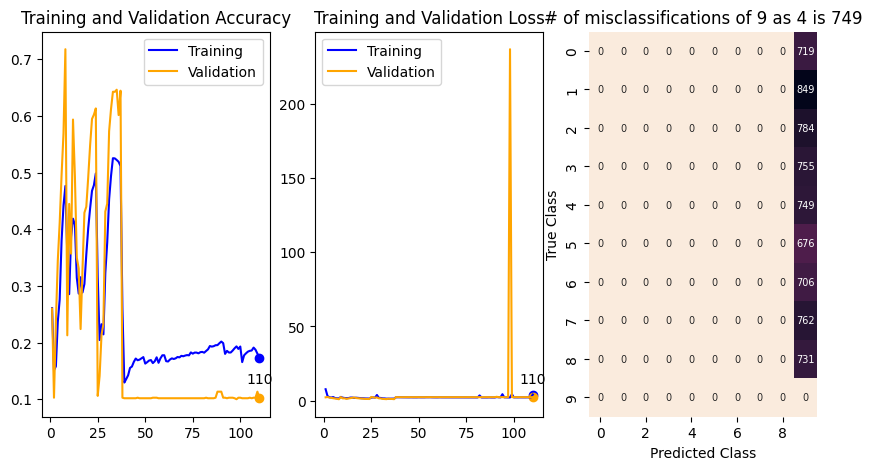

<Figure size 2000x1000 with 0 Axes>

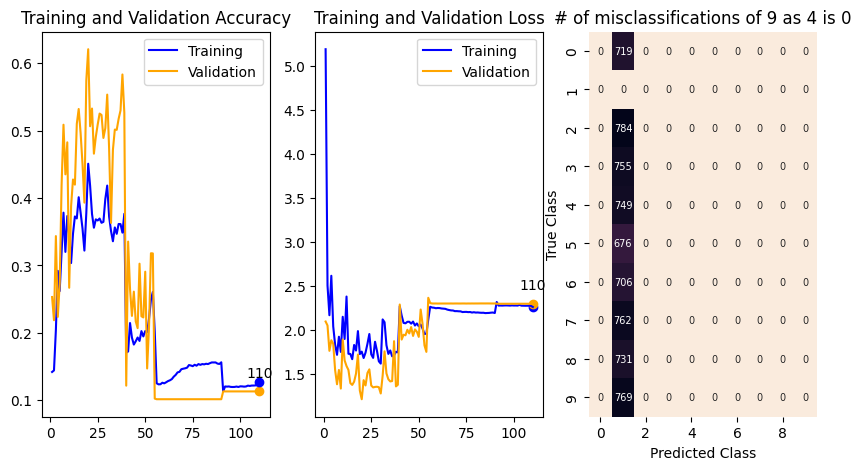

<Figure size 2000x1000 with 0 Axes>

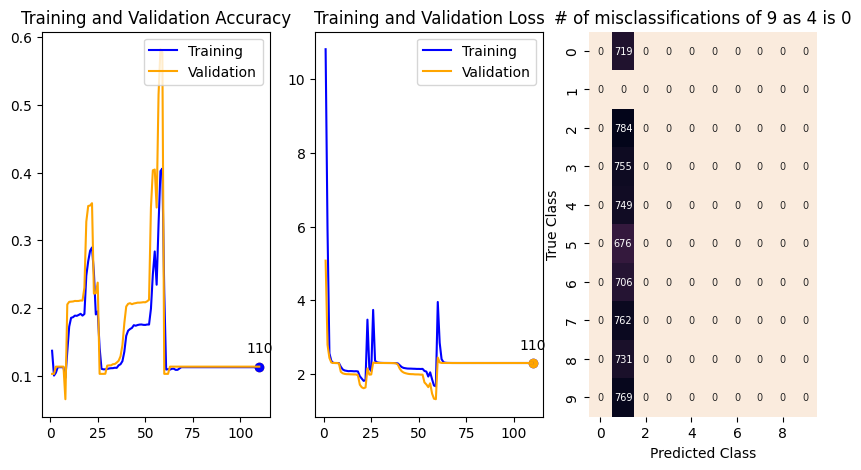

<Figure size 2000x1000 with 0 Axes>

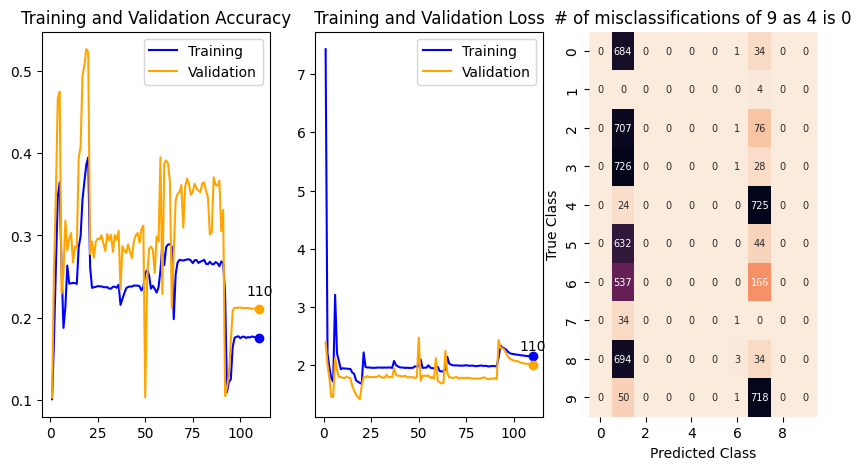

<Figure size 2000x1000 with 0 Axes>

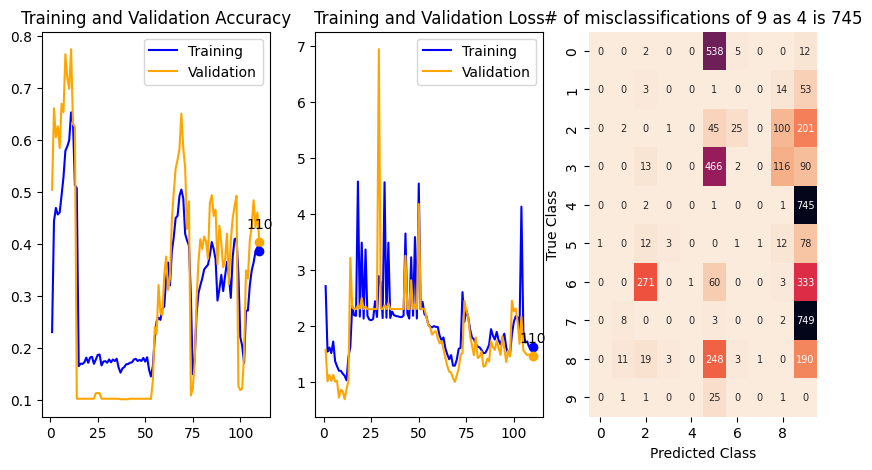

<Figure size 2000x1000 with 0 Axes>

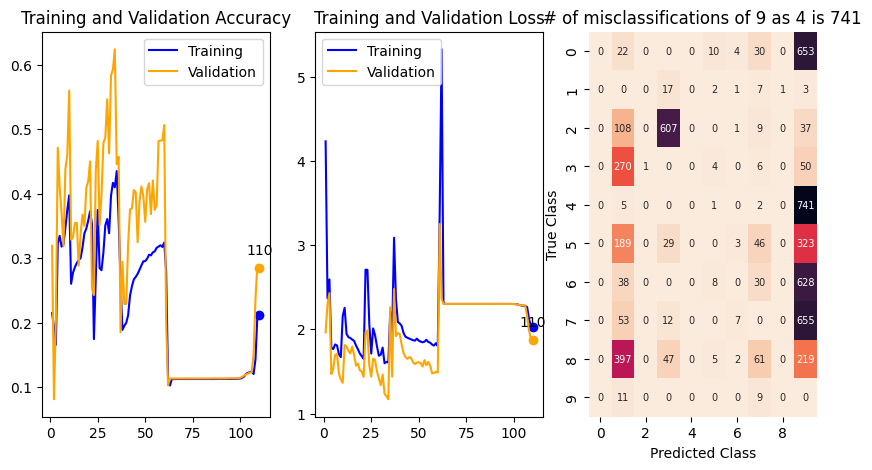

In [16]:
for i in range(len(df["model_history"])):
  plot_model_history(df["model_history"][i], 110, df["model_history"][i].history["cm_per_epoch"][-1].reshape((10,10)))

  plt.gcf().set_size_inches(10, 5)  # this works 
  # plt.gcf().suptitle(f"Lambda Value {lambda_val} for {nb_epoch} Epochs and Patience {patience} " )

  





In [17]:
df["model_history"][0].history["cm_per_epoch"][-1].reshape((10,10))

# 
#The 30th rep has 10 misclassified 9s as 4s 
# df["model_history"][29].history["cm_per_epoch"][-1].reshape((10,10))[9][4]


array([[708,   0,   2,   1,   0,   3,   2,   1,   1,   1],
       [  0, 838,   2,   3,   0,   1,   1,   1,   3,   0],
       [  2,   2, 769,   1,   1,   0,   1,   6,   1,   1],
       [  1,   0,   5, 736,   0,   1,   0,   7,   4,   1],
       [  0,   0,   4,   0, 717,   0,   4,   1,   1,  22],
       [  3,   1,   0,  10,   2, 646,   4,   1,   4,   5],
       [  7,   3,   3,   0,   5,   4, 682,   0,   2,   0],
       [  2,   7,  12,   1,   4,   0,   0, 728,   1,   7],
       [  6,   1,   6,   2,   4,   6,   0,   8, 694,   4],
       [  3,   4,   1,   6,  10,   2,   0,   7,   2, 734]])

Statistics

In [18]:
# Needs to be re-done for multiple costs!

for x, group in df.groupby("cost"):
  
  print(" -------------- ")

  print("Group of Lambda-Value:",   x)

  print("The minimum Validation Loss occurred at the following epochs for the reps")


  for index in group.index:  
    print("index", index)
    sum_9T_4P = 0
    sum_4T_9P = 0
    for rep in range(1,len(group)+1):
      print(" -------------- ")

      # for epoch in range(len(group["model_history"][index].history["val_loss"])):
      #   print("Epoch:", epoch)
      # print("The minimum Validation Loss occurred at the following epochs for the reps")

      # for epoch_num in range(len(group["model_history"][index].history["val_loss"])):  #This tells you how many epochs there are
      print("Cost: ", k,  "Rep:", rep,  end="\t")
      print("Epoch: ", np.argmin(group["model_history"][index].history["val_loss"]), end="\t")
      print("CM_9T_4P at that epoch: ",  group["model_history"][index].history["cm_per_epoch"][np.argmin(group["model_history"][index].history["val_loss"])].reshape((10,10))[9][4]     , end="\t")
      print("CM_4T_9P at that epoch: ",  group["model_history"][index].history["cm_per_epoch"][np.argmin(group["model_history"][index].history["val_loss"])].reshape((10,10))[4][9]     )



      sum_9T_4P += group["model_history"][index].history["cm_per_epoch"][np.argmin(group["model_history"][index].history["val_loss"])].reshape((10,10))[9][4]  
      sum_4T_9P += group["model_history"][index].history["cm_per_epoch"][np.argmin(group["model_history"][index].history["val_loss"])].reshape((10,10))[4][9]  


    print("The average misclassifications of 9 as 4 if Early Stopping Took place: ", sum_9T_4P/len(group["model_history"]),   "\t ", ((sum_9T_4P/len(group["model_history"]))/np.sum(cm_all, axis=2)[0][9])*100 , "percent"   )
    print("The average reverse misclassifications of 4 as 9 if Early Stopping Took place: ", sum_4T_9P/len(group["model_history"]),   "\t ", ((sum_4T_9P/len(group["model_history"]))/np.sum(cm_all, axis=2)[0][4])*100 , "percent"   )


      # sum_94 = 0
      # sum_49 = 0

      # # for epoch_num in range(len(group["model_history"][rep].history["val_loss"])):  #This tells you how many epochs there are
      # #     # print(cm_all[j][9][4])
      # sum_49 += group["model_history"][epoch].history["cm_per_epoch"][-1].reshape((10,10))[4][9]
      # sum_94 += group["model_history"][rep].history["cm_per_epoch"][-1].reshape((10,10))[9][4]

      #     # print(sum_cm)

    print(" -------------- ")
      # print("The average misclassifications if taken out to the last training epoch: ", sum_94/len(cm_all), "\t ", (sum_94/np.sum(cm_all, axis=2)[0][9])*100 , "percent"   )
      # print("The average reverse misclassifications if taken out to the last training epoch: ", sum_49/len(cm_all), "\t ", (sum_49/len(cm_all)/np.sum(cm_all, axis=2)[0][4])*100 , "percent"   )

      # # Val # of 9s 769.0
      # #Get the original total number of 9s in the Val Set
      # np.sum(cm_all, axis=2)[0][9]

      # # Val # of 4s 749.0
      # np.sum(cm_all, axis=2)[0][4]


 -------------- 
Group of Lambda-Value: 10
The minimum Validation Loss occurred at the following epochs for the reps
index 0
 -------------- 
Cost:  1000 Rep: 1	Epoch:  91	CM_9T_4P at that epoch:  4	CM_4T_9P at that epoch:  40
 -------------- 
Cost:  1000 Rep: 2	Epoch:  91	CM_9T_4P at that epoch:  4	CM_4T_9P at that epoch:  40
 -------------- 
Cost:  1000 Rep: 3	Epoch:  91	CM_9T_4P at that epoch:  4	CM_4T_9P at that epoch:  40
 -------------- 
Cost:  1000 Rep: 4	Epoch:  91	CM_9T_4P at that epoch:  4	CM_4T_9P at that epoch:  40
 -------------- 
Cost:  1000 Rep: 5	Epoch:  91	CM_9T_4P at that epoch:  4	CM_4T_9P at that epoch:  40
 -------------- 
Cost:  1000 Rep: 6	Epoch:  91	CM_9T_4P at that epoch:  4	CM_4T_9P at that epoch:  40
 -------------- 
Cost:  1000 Rep: 7	Epoch:  91	CM_9T_4P at that epoch:  4	CM_4T_9P at that epoch:  40
 -------------- 
Cost:  1000 Rep: 8	Epoch:  91	CM_9T_4P at that epoch:  4	CM_4T_9P at that epoch:  40
 -------------- 
Cost:  1000 Rep: 9	Epoch:  91	CM_9T_4P at 

Taking the Average Confusion Matrix using the last confusion matrix per epoch, (per cost), divided by reps

In [19]:
for k, group in df.groupby("cost"):  
  print(" -------------- ")
  print("Group of Lambda-Value:",   k)

  # print(group.index)
  # print(group) 
  
  total_cm_per_rep = np.zeros((10,10))
  for index in group.index:
    print("Index:",   index) 


    # for epoch in range(len(group["model_history"][index].history["val_loss"])):
    #   # print("index: ", index, "cost: ", k, "rep: ", rep)
    total_cm_per_rep += (group["model_history"][index].history["cm_per_epoch"][-1].reshape((10,10)))
    # print(total_cm_per_rep)
  print(pd.DataFrame(total_cm_per_rep/len(group.index)))

 -------------- 
Group of Lambda-Value: 10
Index: 0
Index: 1
Index: 2
Index: 3
Index: 4
Index: 5
Index: 6
Index: 7
Index: 8
Index: 9
       0      1      2      3      4      5      6      7      8      9
0  709.5    0.0    1.1    1.0    0.5    1.5    1.8    1.1    1.8    0.7
1    0.0  836.5    2.6    3.2    0.0    1.8    1.6    0.6    2.7    0.0
2    3.2    2.5  764.7    1.6    1.6    0.4    2.1    5.6    2.1    0.2
3    1.0    0.1    4.6  732.5    0.1    6.5    0.0    6.3    3.0    0.9
4    0.8    0.2    2.7    0.1  715.3    0.0    6.0    1.1    1.9   20.9
5    2.2    0.7    0.2    9.3    2.1  646.5    4.8    1.5    5.0    3.7
6    7.4    2.5    2.0    0.0    4.5    4.3  683.2    0.0    2.0    0.1
7    2.2    7.6    7.8    3.8    3.0    0.0    0.1  728.0    1.8    7.7
8    6.1    1.9    3.5    6.2    4.2    3.9    2.0    5.8  693.7    3.7
9    4.1    4.3    0.2    7.5    8.1    5.5    0.4    5.5    2.2  731.2
 -------------- 
Group of Lambda-Value: 100
Index: 10
Index: 11
Index: 12
I

In [20]:

for k, group in df.groupby("cost"):
  
  print(" -------------- ")

  print("Group of Lambda-Value:",   k)

  # print(group.index)
  # print(group)
  for index in group.index:
    print(index)
    for rep in range(1,len(group)+1):
      print("Rep: ", rep)
       


      for epoch in range(len(group["model_history"][index].history["cm_per_epoch"])):
        # print("index: ", index, "cost: ", k, "rep: ", rep, "epochs: ", epoch) #"last cm:", group["model_history"][index].history["cm_per_epoch"][rep].reshape((10,10)))
        print("epoch: ", epoch)




Streaming output truncated to the last 5000 lines.
epoch:  109
Rep:  6
epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoc